<a href="https://colab.research.google.com/github/33220311/Extremophilic/blob/main/Multiclass_Embedding_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 33.1 MB/s eta 0

## Prerequisite

In [2]:
!pip install sklearn-evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 13.6 MB/s eta 0:00:00


In [3]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.1 MB/s eta 0:00:00


In [4]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 25.3 MB/s eta 0:00:00


In [5]:
import numpy as np
import h5py
import tensorflow as tf
import pandas as pd
from pandas import DataFrame

# Data utilities
from pandas import read_csv
import matplotlib.pyplot as plt
# Data visualization
import plotly.express as px

# Machine learning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn_evaluation import plot
from sklearn.metrics import accuracy_score, make_scorer, f1_score, recall_score


2024-11-04 03:46:32.780886: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 03:46:32.830700: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 03:46:32.831902: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 03:46:33.624428: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [7]:
!wget https://raw.githubusercontent.com/33220311/Acidophilic/main/acido100.csv

--2024-11-04 03:47:02--  https://raw.githubusercontent.com/33220311/Acidophilic/main/acido100.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-04 03:47:02 ERROR 404: Not Found.



In [8]:
!wget https://raw.githubusercontent.com/33220311/Acidophilic/main/acido80.csv

--2024-11-04 03:47:02--  https://raw.githubusercontent.com/33220311/Acidophilic/main/acido80.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-04 03:47:03 ERROR 404: Not Found.



In [9]:
!wget https://raw.githubusercontent.com/33220311/Acidophilic/main/acido60.csv

--2024-11-04 03:47:03--  https://raw.githubusercontent.com/33220311/Acidophilic/main/acido60.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-04 03:47:03 ERROR 404: Not Found.



In [10]:
!wget https://raw.githubusercontent.com/33220311/Acidophilic/main/acido40.csv

--2024-11-04 03:47:03--  https://raw.githubusercontent.com/33220311/Acidophilic/main/acido40.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-04 03:47:03 ERROR 404: Not Found.



In [11]:
!wget https://raw.githubusercontent.com/33220311/Acidophilic/main/acido20.csv

--2024-11-04 03:47:03--  https://raw.githubusercontent.com/33220311/Acidophilic/main/acido20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-04 03:47:04 ERROR 404: Not Found.



## Utility Function

In [12]:
# Utility function: plot model's accuracy and loss

# https://realpython.com/python-keras-text-classification/
plt.style.use('ggplot')

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

In [13]:
# Utility function: Display model score(Loss & Accuracy) across all sets.

def display_model_score(model, train, val, test, batch_size):

  train_score = model.evaluate(train[0], train[1], batch_size=batch_size, verbose=1)
  print('Train loss: ', train_score[0])
  print('Train accuracy: ', train_score[1])
  print('-'*70)

  val_score = model.evaluate(val[0], val[1], batch_size=batch_size, verbose=1)
  print('Val loss: ', val_score[0])
  print('Val accuracy: ', val_score[1])
  print('-'*70)

  test_score = model.evaluate(test[0], test[1], batch_size=batch_size, verbose=1)
  print('Test loss: ', test_score[0])
  print('Test accuracy: ', test_score[1])

In [14]:
def error_rate(testing_labels, predicted_testing_labels):
  from sklearn.metrics import f1_score, balanced_accuracy_score, matthews_corrcoef
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import classification_report
  #import tensorflow_addons as tfa

  import numpy as np

  bootstrap_performances = list()
  performances = list()
  f1_performances = list()
  sn = list()
  sp = list()
  Y = np.array(testing_labels) # convert list of groundtruths to numpy
  Yhat = np.array(predicted_testing_labels) # same same for predictions
  n_samples = len(Y) # get number of samples
  n_bootstrap = 1000 # number of bootstrap iterations
  metric = matthews_corrcoef # the metric you want to compute
  for i in range(n_bootstrap): # for each bootstrap draw
    subset = np.random.choice(n_samples, n_samples, replace=True)
    # create a random subset of your predictions/targets with replacement (this line will only generate the indices for list elements and the line below will grab the random subset with replacement
    bootstrap_performances.append( matthews_corrcoef(testing_labels[subset], predicted_testing_labels[subset]) )
    performances.append(accuracy_score(testing_labels[subset], predicted_testing_labels[subset]))
    f1_performances.append(f1_score(testing_labels[subset], predicted_testing_labels[subset],average='macro'))
    sn.append(recall_score(testing_labels[subset], predicted_testing_labels[subset],labels=[1],average='macro'))
    sp.append(recall_score(testing_labels[subset], predicted_testing_labels[subset],labels=[1],average='macro'))
  sd_mcc = np.std(bootstrap_performances) # compute std deviation over the bootstrapped performances
  sd_acc = np.std(performances)
  sd_f1 = np.std(f1_performances)
  sd_sn = np.std(sn)
  sd_sp = np.std(sp)

  print('acc:',accuracy_score(testing_labels, predicted_testing_labels))
  print('f1:',f1_score(testing_labels, predicted_testing_labels,average='macro'))
  print('mcc:',matthews_corrcoef(testing_labels, predicted_testing_labels))
  print('sn:',sn)
  print('sp:',sp)
  print('sd_acc:',sd_acc)
  print('sd_f1:',sd_f1)
  print('sd_mcc:',sd_mcc)
  print('sd_sn:',sd_sn)
  print('sd_sp:',sd_sp)
  print(classification_report(testing_labels, predicted_testing_labels))

  return (sd_acc, sd_mcc, sd_f1)


In [15]:
def conf_matrix(confusion_matrix_data):
  from mlxtend.plotting import plot_confusion_matrix
  fig, ax = plot_confusion_matrix(conf_mat =confusion_matrix_data,
                                show_absolute=True,
                                show_normed=True,
                                #display_labels=class_dict.values(),
                                colorbar=True)
  labels = ['Thermophilic', 'Halophilic', 'Alkaliphilic', 'Acidophilic']
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.show()


In [16]:
def std_acc(clf,X,y):
  from sklearn.metrics import accuracy_score
  import numpy as np

  bootstrap_performances = list()
  performances = list()
  y_pred = clf.predict(X)
  Y = np.array(y) # convert list of groundtruths to numpy
  Yhat = np.array(y_pred) # same same for predictions
  n_samples = len(Y) # get number of samples
  n_bootstrap = 1000 # number of bootstrap iterations
  for i in range(n_bootstrap): # for each bootstrap draw
    subset = np.random.choice(n_samples, n_samples, replace=True)
    # create a random subset of your predictions/targets with replacement (this line will only generate the indices for list elements and the line below will grab the random subset with replacement
    bootstrap_performances.append( accuracy_score(y[subset], y_pred[subset]) )
  sd_acc = np.std(bootstrap_performances)*1.96
  return sd_acc

In [17]:
def std_f1(clf,X,y):
  from sklearn.metrics import f1_score
  import numpy as np

  bootstrap_performances = list()
  performances = list()
  y_pred = clf.predict(X)
  Y = np.array(y) # convert list of groundtruths to numpy
  Yhat = np.array(y_pred) # same same for predictions
  n_samples = len(Y) # get number of samples
  n_bootstrap = 1000 # number of bootstrap iterations
  for i in range(n_bootstrap): # for each bootstrap draw
    subset = np.random.choice(n_samples, n_samples, replace=True)
    # create a random subset of your predictions/targets with replacement (this line will only generate the indices for list elements and the line below will grab the random subset with replacement
    bootstrap_performances.append(f1_score(y[subset], y_pred[subset]) )
  sd_f1 = np.std(bootstrap_performances)*1.96
  return sd_f1

In [18]:
def std_mcc(clf,X,y):
  from sklearn.metrics import matthews_corrcoef
  import numpy as np

  bootstrap_performances = list()
  performances = list()
  y_pred = clf.predict(X)
  Y = np.array(y) # convert list of groundtruths to numpy
  Yhat = np.array(y_pred) # same same for predictions
  n_samples = len(Y) # get number of samples
  n_bootstrap = 1000 # number of bootstrap iterations
  for i in range(n_bootstrap): # for each bootstrap draw
    subset = np.random.choice(n_samples, n_samples, replace=True)
    # create a random subset of your predictions/targets with replacement (this line will only generate the indices for list elements and the line below will grab the random subset with replacement
    bootstrap_performances.append(matthews_corrcoef(y[subset], y_pred[subset]) )
  sd_mcc = np.std(bootstrap_performances)*1.96
  return sd_mcc

## Open embedding file

In [19]:
proteins = []

In [20]:
!wget https://raw.githubusercontent.com/33220311/Extremophilic/main/Dataset/Multiclass.csv

--2024-11-04 03:47:04--  https://raw.githubusercontent.com/33220311/Extremophilic/main/Dataset/Multiclass.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2679788 (2.6M) [text/plain]
Saving to: ‘Multiclass.csv’

Multiclass.csv      100%[===================>]   2.55M  --.-KB/s    in 0.1s    

2024-11-04 03:47:04 (24.9 MB/s) - ‘Multiclass.csv’ saved [2679788/2679788]



In [21]:
!wget https://github.com/33220311/Extremophilic/raw/main/Embeddings/acidoAdd.h5

--2024-11-04 03:47:05--  https://github.com/33220311/Extremophilic/raw/main/Embeddings/acidoAdd.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/main/Embeddings/acidoAdd.h5 [following]
--2024-11-04 03:47:05--  https://raw.githubusercontent.com/33220311/Extremophilic/main/Embeddings/acidoAdd.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38940176 (37M) [application/octet-stream]
Saving to: ‘acidoAdd.h5’

acidoAdd.h5         100%[===================>]  37.14M  43.5MB/s    in 0.9s    

2024-11-04 03:47:08 (43.5 MB/s) - ‘acidoAdd.h5’ saved [38940176/38940176]



In [22]:
!wget https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAdd2.h5

--2024-11-04 03:47:08--  https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAdd2.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAdd2.h5 [following]
--2024-11-04 03:47:08--  https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAdd2.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12072464 (12M) [application/octet-stream]
Saving to: ‘acidoAdd2.h5’

acidoAdd2.h5        100%[===================>]  11.51M  47.3MB/s    in 0.2s    

2024-11-04 03:47:09 (47.3 MB/s) - ‘acidoAdd2.h5’

In [23]:
!wget https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAdd3.h5

--2024-11-04 03:47:09--  https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAdd3.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAdd3.h5 [following]
--2024-11-04 03:47:10--  https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAdd3.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12080384 (12M) [application/octet-stream]
Saving to: ‘acidoAdd3.h5’

acidoAdd3.h5        100%[===================>]  11.52M  46.7MB/s    in 0.2s    

2024-11-04 03:47:11 (46.7 MB/s) - ‘acidoAdd3.h5’

In [24]:
!wget https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAdd4.h5

--2024-11-04 03:47:11--  https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAdd4.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAdd4.h5 [following]
--2024-11-04 03:47:11--  https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAdd4.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2647296 (2.5M) [application/octet-stream]
Saving to: ‘acidoAdd4.h5’

acidoAdd4.h5        100%[===================>]   2.52M  --.-KB/s    in 0.1s    

2024-11-04 03:47:12 (25.5 MB/s) - ‘acidoAdd4.h5’

In [25]:
!wget https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAddT5.h5

--2024-11-04 03:47:12--  https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAddT5.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAddT5.h5 [following]
--2024-11-04 03:47:12--  https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAddT5.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53267712 (51M) [application/octet-stream]
Saving to: ‘acidoAddT5.h5’

acidoAddT5.h5       100%[===================>]  50.80M  60.9MB/s    in 0.8s    

2024-11-04 03:47:17 (60.9 MB/s) - ‘acidoAddT

In [26]:
!wget https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAddT52.h5

--2024-11-04 03:47:17--  https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAddT52.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAddT52.h5 [following]
--2024-11-04 03:47:18--  https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAddT52.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40370136 (38M) [application/octet-stream]
Saving to: ‘acidoAddT52.h5’

acidoAddT52.h5      100%[===================>]  38.50M  57.8MB/s    in 0.7s    

2024-11-04 03:47:21 (57.8 MB/s) - ‘acido

In [27]:
!wget https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAddT53.h5

--2024-11-04 03:47:22--  https://github.com/33220311/Extremophilic/raw/refs/heads/main/Embeddings/acidoAddT53.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAddT53.h5 [following]
--2024-11-04 03:47:22--  https://raw.githubusercontent.com/33220311/Extremophilic/refs/heads/main/Embeddings/acidoAddT53.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3097856 (3.0M) [application/octet-stream]
Saving to: ‘acidoAddT53.h5’

acidoAddT53.h5      100%[===================>]   2.95M  --.-KB/s    in 0.1s    

2024-11-04 03:47:23 (21.2 MB/s) - ‘acido

In [28]:
with h5py.File('acidoAdd.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [29]:
with h5py.File('acidoAdd2.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [30]:
with h5py.File('acidoAdd3.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [31]:
with h5py.File('acidoAdd4.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [32]:
with h5py.File('acidoAddT5.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [33]:
with h5py.File('acidoAddT52.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [34]:
with h5py.File('acidoAddT53.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [35]:
!wget https://github.com/33220311/Extremophilic/raw/main/Embeddings/haloAdd.h5

--2024-11-04 03:47:33--  https://github.com/33220311/Extremophilic/raw/main/Embeddings/haloAdd.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/main/Embeddings/haloAdd.h5 [following]
--2024-11-04 03:47:34--  https://raw.githubusercontent.com/33220311/Extremophilic/main/Embeddings/haloAdd.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18247096 (17M) [application/octet-stream]
Saving to: ‘haloAdd.h5’

haloAdd.h5          100%[===================>]  17.40M  36.8MB/s    in 0.5s    

2024-11-04 03:47:35 (36.8 MB/s) - ‘haloAdd.h5’ saved [18247096/18247096]



In [36]:
with h5py.File('haloAdd.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [37]:
!wget https://github.com/33220311/Extremophiles/raw/main/thermophilic_embedding.h5

--2024-11-04 03:47:37--  https://github.com/33220311/Extremophiles/raw/main/thermophilic_embedding.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophiles/main/thermophilic_embedding.h5 [following]
--2024-11-04 03:47:37--  https://raw.githubusercontent.com/33220311/Extremophiles/main/thermophilic_embedding.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15672848 (15M) [application/octet-stream]
Saving to: ‘thermophilic_embedding.h5’

thermophilic_embedd 100%[===================>]  14.95M  32.4MB/s    in 0.5s    

2024-11-04 03:47:38 (32.4 MB/s) - ‘thermophilic_embedding.h5’ 

In [38]:
with h5py.File('thermophilic_embedding.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [39]:
!wget https://github.com/33220311/Extremophilic/raw/main/Embeddings/alkaliAdd.h5

--2024-11-04 03:47:40--  https://github.com/33220311/Extremophilic/raw/main/Embeddings/alkaliAdd.h5
Resolving github.com (github.com)... 4.225.11.194
Connecting to github.com (github.com)|4.225.11.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/main/Embeddings/alkaliAdd.h5 [following]
--2024-11-04 03:47:40--  https://raw.githubusercontent.com/33220311/Extremophilic/main/Embeddings/alkaliAdd.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7912704 (7.5M) [application/octet-stream]
Saving to: ‘alkaliAdd.h5’

alkaliAdd.h5        100%[===================>]   7.55M  30.9MB/s    in 0.2s    

2024-11-04 03:47:41 (30.9 MB/s) - ‘alkaliAdd.h5’ saved [7912704/7912704]



In [40]:
with h5py.File('alkaliAdd.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [41]:
annotations = read_csv('Multiclass.csv')

In [42]:
annotations[annotations["label"]==3]

,identifier,sequence,label,set
8570,AIA54169,MSEHGLHTHAPHEEALHHGAGSGHSLGQWVAIFTAILAAFGAVVSY...,3,train
8571,KUO97392,MISILKRVDKQAERPLELKPLPVAIGLILVVFAVWLFFHYRHSWHH...,3,train
8572,OOH71281,VYIRADADYGIVKIDYLRSFIKRNCLKFFFNKVDFYSIESSPVLKE...,3,train
8573,OIR01459,MKKLHFVALVLTSLSLNAMADDSGLFYVAGGASSGGANFSLGAGTD...,3,train
8574,RNF58137,MMAAPTARATRRFAAFLFTAIAIYGLWAIFLSIHTIVQQAPVRRHL...,3,test
...,...,...,...,...
12654,OWP53648,MTTSSTTTSNPSNETSKQKTTKTNGSVFVSMLEQAVRLIDEGRSPS...,3,test
12655,OWP56409,MKYEEGRRQKALEIAVRRKTKQEREHWIVPSQSGSHFVCYAMNEPI...,3,train
12656,OWP57104,MSRYLPELKDKNEREISSKDLTKTQLLGYIFADFVKGGFIVVSLII...,3,train
12657,OWP57146,MIKITREARGFIVNKGFRAIYLNLTYVKGPCADNLCKAIPKVAVST...,3,test


In [43]:
# Basic Protocol 3 — Step 6
train_set = annotations[annotations.set == "train"]
test_set = annotations[annotations.set == "test"]

In [44]:
print(f"The train set contains {len(train_set)} samples, and we will test on {len(test_set)} samples.")

The train set contains 10450 samples, and we will test on 2209 samples.


In [45]:
# Basic Protocol 3 — Step 7

training_embeddings = list()
training_identifiers = train_set.identifier.values
training_labels = train_set.label.values
print(len(training_identifiers))
print(len(training_labels))

10450
10450


In [46]:
train_set.identifier.values

array(['CYSO_AERPE', 'G1PDH_AERPE', 'DNLI_AERPE', ..., 'OWP56409',
       'OWP57104', 'OWP57370'], dtype=object)

In [47]:
testing_embeddings = list()
testing_identifiers = test_set.identifier.values
testing_labels = test_set.label.values
print(len(testing_identifiers))
print(len(testing_labels))

2209
2209


In [48]:
seq = dict(proteins)
delete = list()

In [49]:
for identifier in training_identifiers:
        if identifier in seq:
            embedding = seq[identifier]
            training_embeddings.append(embedding)
        else:
          delete.append(identifier)

In [50]:
len(training_embeddings)

10449

In [51]:
for identifier in testing_identifiers:
        if identifier in seq:
            embedding = seq[identifier]
            testing_embeddings.append(embedding)
        else:
          delete.append(identifier)

In [52]:
len(testing_embeddings)

2209

In [53]:
np.where(training_identifiers=='GAX78753')

(array([9284]),)

In [54]:
training_identifiers = np.delete(training_identifiers,9284)
training_labels = np.delete(training_labels,9284)

In [55]:
# A sanity check: make sure that the numbers are equal!
assert(len(training_identifiers) == len(training_embeddings))
assert(len(testing_identifiers) == len(testing_embeddings))

In [56]:
training_embeddings[:3]

[array([[ 0.09515 , -0.0448  ,  0.01404 , ..., -0.03482 ,  0.04388 ,
          0.012245]], dtype=float16),
 array([[ 0.0965  ,  0.02017 ,  0.014626, ..., -0.01959 ,  0.01561 ,
         -0.03708 ]], dtype=float16),
 array([[ 0.0333 , -0.01483,  0.01205, ..., -0.05026, -0.00644,  0.02141]],
       dtype=float16)]

In [57]:
df =pd.DataFrame(delete)
df.to_excel('/content/delete.xlsx')

OSError: Cannot save file into a non-existent directory: '/content'

In [ ]:
delete

## Training

In [58]:
arr_train = np.array(training_embeddings)
nsample, nx, ny = arr_train.shape
train_dataset = arr_train.reshape((nsample, nx*ny))
train_dataset.shape

(10449, 1024)

In [59]:
arr_test = np.array(testing_embeddings)
nsample, nx, ny = arr_test.shape
test_dataset = arr_test.reshape((nsample, nx*ny))
test_dataset.shape

(2209, 1024)

### LR

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer, f1_score

In [61]:
from numpy.random import seed
seed(1)

In [62]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [63]:
protein_classes = ['Thermophilic', 'Halophilic', 'Alkaliphilic','Acidophilic']
#training_labels = tf.keras.utils.to_categorical(training_labels)
#testing_labels =  tf.keras.utils.to_categorical(testing_labels)


In [64]:
lr =LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_history = lr.fit(train_dataset, training_labels)
lr.score(test_dataset,testing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.7220461747397012

In [65]:
scoring ={'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score, average='macro'),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [66]:
scores = cross_validate(lr, train_dataset, training_labels, scoring=scoring, cv=10)
scores

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

{'fit_time': array([19.47300124, 14.80230641, 11.49656391, 12.7962203 , 14.49960136,
        12.20118666, 12.1951468 , 14.89085197, 14.00409555, 19.80274081]),
 'score_time': array([0.19825816, 0.10272694, 0.10405803, 0.10002661, 0.1988616 ,
        0.10183239, 0.10844398, 0.10140467, 0.19562459, 0.10335302]),
 'test_accuracy': array([0.78277512, 0.80478469, 0.7923445 , 0.76650718, 0.73014354,
        0.74641148, 0.68133971, 0.78181818, 0.73014354, 0.77681992]),
 'test_f1': array([0.75697271, 0.76222309, 0.76190669, 0.70579784, 0.67370562,
        0.70112026, 0.64509075, 0.70906115, 0.70420873, 0.74028674]),
 'test_mcc': array([0.69355218, 0.72145893, 0.70320232, 0.66707658, 0.61495453,
        0.63736481, 0.54579294, 0.68810572, 0.61603997, 0.67867715])}

In [67]:
predicted_training_labels = lr.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

acc: 0.8216097234185089
f1: 0.7866880458136523
mcc: 0.7447866254444667
sn: [0.8151622718052738, 0.8043312101910828, 0.8149721263604991, 0.8205461638491548, 0.8082083662194159, 0.8108860759493671, 0.8112712975098296, 0.8118657298985168, 0.8082474226804124, 0.8158031088082901, 0.8081180811808119, 0.8153526970954357, 0.8134595701125895, 0.8044914134742405, 0.8053777208706786, 0.806401652039236, 0.8091936312275295, 0.8193114159979291, 0.8068389454450535, 0.8209538702111024, 0.815653964984552, 0.8068559733947301, 0.8017286537454165, 0.8139171227521501, 0.8100936524453695, 0.8045793397231097, 0.8106139438085328, 0.8040699191234021, 0.8074074074074075, 0.8056809131935228, 0.809215635516438, 0.8014861995753716, 0.815180660254744, 0.8162359697206996, 0.8207547169811321, 0.8193798449612403, 0.8153806977336389, 0.805852417302799, 0.8108941418293937, 0.8127291775798847, 0.8141874007411328, 0.8007741935483871, 0.8062095730918499, 0.8169801728520589, 0.8172484599589322, 0.8091523660946438, 0.8159937

(0.0036844277821904406, 0.005267651006268714, 0.004874011795275687)

In [69]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.9 MB/s eta 0:00:00


/tmp/ipykernel_2297/1155589874.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_2297/1155589874.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


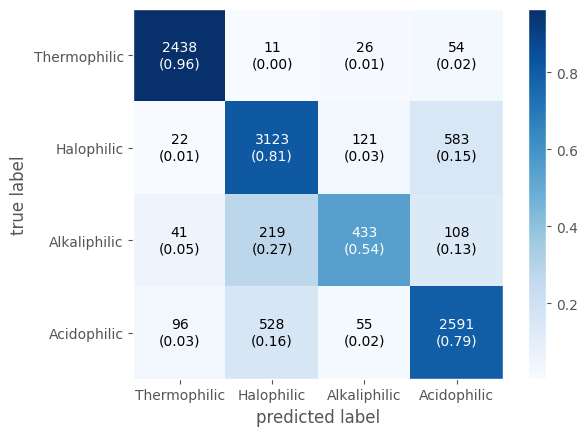

In [70]:
classes = np.unique(training_labels)

confusion_matrix_data = confusion_matrix(training_labels, predicted_training_labels, labels=classes)
conf_matrix(confusion_matrix_data)

In [71]:
predicted_testing_labels = lr.predict(test_dataset)
error_rate(testing_labels, predicted_testing_labels)

acc: 0.7220461747397012
f1: 0.5712721942350707
mcc: 0.5172833390110031
sn: [0.7633187772925765, 0.7796312554872695, 0.783641160949868, 0.7919174548581256, 0.7546174142480211, 0.7794117647058824, 0.7851027397260274, 0.7780701754385965, 0.7647058823529411, 0.771135781383433, 0.7943760984182777, 0.7701543739279588, 0.7602739726027398, 0.7961082910321489, 0.777027027027027, 0.7831526271893244, 0.784991568296796, 0.7523484201537147, 0.7877237851662404, 0.7668122270742358, 0.7577586206896552, 0.795316565481353, 0.7778723404255319, 0.7830913748932536, 0.7726480836236934, 0.7608695652173914, 0.7753562447611064, 0.7502124044180118, 0.7624683009298394, 0.7595486111111112, 0.7607204116638079, 0.7510803802938635, 0.7576013513513513, 0.7790794979079498, 0.7655462184873949, 0.7637931034482759, 0.7830508474576271, 0.7534364261168385, 0.765262252794497, 0.7538726333907056, 0.7619877942458587, 0.7613240418118467, 0.7548936170212766, 0.7555358724534986, 0.7610544217687075, 0.7664172901080631, 0.76969178

(0.009483658451289206, 0.016192350269254533, 0.02133785200593243)

/tmp/ipykernel_2297/1155589874.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_2297/1155589874.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


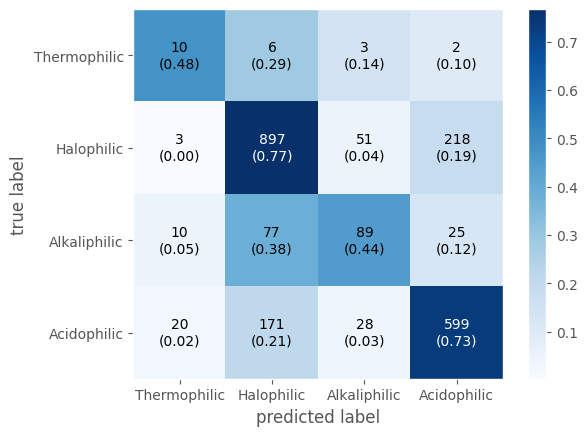

In [72]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_testing_labels, labels=classes)
conf_matrix(confusion_matrix_data)

### MLP with Grid Search

In [73]:
# Machine learning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [74]:
# Basic Protocol 3 — Step 8

multilayerperceptron = MLPClassifier(solver='lbfgs', random_state=10, max_iter=1000)

parameters = {
    'hidden_layer_sizes': [(32,)],
    #'learning_rate_init': [0.001, 0.0001, 0.01],
    'solver':['adam']#,'sgd'],
    #'learning_rate': ['constant','adaptive'],
}

In [75]:
grid_scorer ={'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score, average='macro'),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [76]:
classifiers = GridSearchCV(multilayerperceptron, parameters, cv=10, scoring=grid_scorer, refit='f1')
history = classifiers.fit(train_dataset, training_labels)
classifier = classifiers.best_estimator_

In [77]:
df =pd.DataFrame(classifiers.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Multiclass/T5BMLP.xlsx')

OSError: Cannot save file into a non-existent directory: '/content'

In [ ]:
#plot.grid_search(classifiers.cv_results_, change= 'hidden_layer_sizes', kind='bar')

In [78]:
params = classifier.get_params()
params

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (32,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [79]:
predicted_training_labels = classifier.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

acc: 0.9977988324241555
f1: 0.9978826767215259
mcc: 0.9968644886215164
sn: [0.9994841372194996, 0.9997364953886693, 1.0, 0.9989904088844018, 0.9994962216624685, 0.999468085106383, 0.9997376016793492, 1.0, 1.0, 1.0, 0.999743062692703, 0.9991989319092123, 0.9997395154988278, 0.9997434581836839, 0.9989714579583441, 0.9997420020639834, 0.9997387669801463, 1.0, 0.9997412677878396, 1.0, 0.9997391757955139, 0.9992144540455616, 0.9994735456699131, 0.9994666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999475478625754, 0.9994863893168978, 1.0, 0.9994772608468374, 1.0, 0.9997446373850868, 0.999738082765846, 1.0, 0.9994772608468374, 0.999475890985325, 0.9994749278025729, 1.0, 1.0, 0.9997374639012864, 0.9994767137624281, 1.0, 1.0, 0.9997429966589566, 0.9997433923530922, 1.0, 0.9997397866250325, 1.0, 1.0, 0.9997372569626904, 0.9992160961588712, 0.9992071881606766, 1.0, 0.9997362173568979, 1.0, 0.9997449630196379, 0.9997403946002077, 0.9997446373850868, 0.9997402597402597, 0.9989761965702585, 1.0, 1.0, 1.0,

(0.00046623107368757324, 0.0006636099006724259, 0.00045697302000099896)

/tmp/ipykernel_2297/1155589874.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_2297/1155589874.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


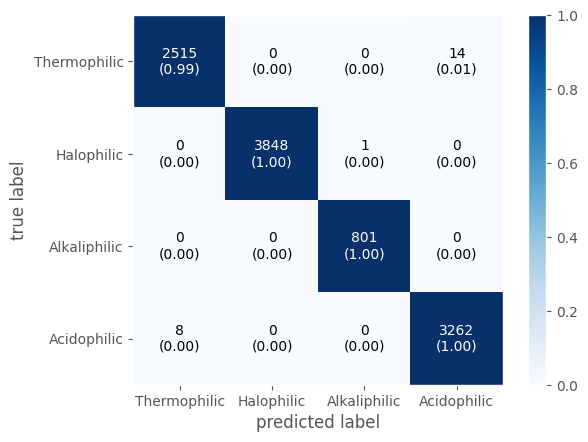

In [80]:
classes = np.unique(training_labels)

confusion_matrix_data = confusion_matrix(training_labels, predicted_training_labels, labels=classes)
conf_matrix(confusion_matrix_data)

In [81]:
predicted_testing_labels = classifier.predict(test_dataset)
error_rate(testing_labels, predicted_testing_labels)

acc: 0.6727025803531009
f1: 0.5335102529733529
mcc: 0.4406371929929315
sn: [0.7110726643598616, 0.6987234042553192, 0.7152658662092625, 0.705073086844368, 0.6862068965517242, 0.6780238500851788, 0.6847545219638242, 0.6961805555555556, 0.7018739352640545, 0.6684118673647469, 0.7059322033898305, 0.7073593073593074, 0.6810856658184903, 0.6984667802385008, 0.7185886402753873, 0.6821305841924399, 0.7014542343883661, 0.6651982378854625, 0.6914623837700761, 0.7039864291772688, 0.6851691240242844, 0.7032312925170068, 0.6991379310344827, 0.7147736976942783, 0.721496953872933, 0.7025264873675632, 0.7074198988195616, 0.6926406926406926, 0.7161458333333334, 0.7040816326530612, 0.6853448275862069, 0.6814814814814815, 0.6940035273368607, 0.7042497831743278, 0.6947094535993061, 0.7034188034188035, 0.6916596461668071, 0.7197290431837426, 0.6927129060579456, 0.6840277777777778, 0.6769759450171822, 0.6825259515570934, 0.69374492282697, 0.6774193548387096, 0.6884247171453438, 0.7145242070116862, 0.685810

(0.009956061012172453, 0.016735289279669198, 0.02224324847771461)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


In [83]:
print("Precision: ", precision_score(testing_labels, predicted_testing_labels, average='macro'))
print("Recall: ", recall_score(testing_labels, predicted_testing_labels, average='macro'))

Precision:  0.5160649357598571
Recall:  0.5753776969132722


In [84]:
# Further metrics
from sklearn.metrics import confusion_matrix

# Data visualization
import plotly.express as px

/tmp/ipykernel_2297/1155589874.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_2297/1155589874.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


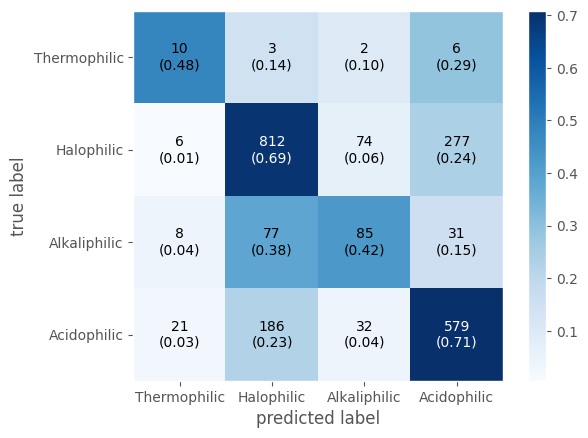

In [85]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_testing_labels, labels=classes)
conf_matrix(confusion_matrix_data)

### CNN with GridSearch

In [86]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
from keras.wrappers.scikit_learn import KerasClassifier

In [87]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from time import time

In [88]:
from numpy.random import seed
seed(1)

In [89]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [90]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [91]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [92]:
n_timesteps, n_features =train_dataset.shape[0], train_dataset.shape[1]

In [93]:
n_epochs = 30 # 30
n_epochs_cv = 10 # 10  # reduce number of epochs for cross validation for performance reason

n_cv = 3
validation_ratio = 0.10
n_outputs = 1

In [94]:
def create_cnn_model_old(pool_type='max', conv_activation='tanh', dropout_rate=0.0, kernel=3, filter1=128, filter2=32, filter3=64, num_classes=1):
    # create model
    model = Sequential()

    # first layer: convolution
    model.add(Conv1D(filters=filter1, kernel_size=kernel, activation=conv_activation, input_shape=(n_features,1)))

    # second series of layers: convolution, pooling, and dropout
    model.add(Conv1D(filters=filter2, kernel_size=kernel, activation=conv_activation))
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    # third series of layers: convolution, pooling, and dropout
    model.add(Conv1D(filters=filter3, kernel_size=kernel, activation=conv_activation))
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    # fourth series
    model.add(Flatten())
    model.add(Dense(64, activation='sigmoid'))

    # Output layer for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    return model


In [95]:
def create_cnn_model(pool_type='max', conv_activation='tanh', dropout_rate=0.0, kernel=3, filter1=128, filter2=32, filter3=64, num_classes=4):
    # create model
    model = Sequential()

    model.add(Input(shape=(n_features,1)))

    # first layer: convolution
    model.add(Conv1D(filters=filter1, kernel_size=kernel, activation=conv_activation, padding='same'))

    # second series of layers: convolution, pooling, and dropout
    model.add(Conv1D(filters=filter2, kernel_size=kernel, activation=conv_activation, padding='same'))
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    # third series of layers: convolution, pooling, and dropout
    model.add(Conv1D(filters=filter3, kernel_size=kernel, activation=conv_activation))
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    # fourth series
    model.add(Flatten())
    model.add(Dense(64, activation='sigmoid'))

    # Output layer for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(
        optimizer='adam',
        # loss='categorical_crossentropy',
        loss = 'sparse_categorical_crossentropy',
        metrics=['accuracy'],
        )
    return model


In [96]:
cnn = create_cnn_model()

2024-11-04 07:44:27.773274: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [97]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1024, 128)         512       
                                                                 
 conv1d_1 (Conv1D)           (None, 1024, 32)          12320     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 32)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 510, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 16320)             0

In [98]:
cnn.save('cnn.h5')

In [99]:
# optimize model
start = time()

# create model
model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# define parameters and values for grid search
param_grid = {
    'pool_type': ['max','average'],
    'conv_activation': ['tanh','relu'],
    #'epochs': [5],
    'kernel':[3, 5, 7],
    'filter1':[32,64],
    'filter2':[32,64],
    'filter3':[32,64],
}

/tmp/ipykernel_2297/4180337653.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_cnn_model, verbose=1)


In [100]:
grid_scorer ={'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score, average='macro'),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [101]:
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, scoring=metrics, refit='f1')
#grid_result = grid.fit(train_dataset, Y_train)

In [102]:
#start = time.time()
# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=3, cv=10, scoring=grid_scorer, refit='f1')
grid_result = grid.fit(train_dataset, Y_train)
#end = time.time()
#duration = end_time - start_time

# Output the best parameters
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)

print("Time taken:", duration)

2024-11-04 07:44:29.845643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:44:29.941428: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:44:29.980269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:44:30.902347: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 07:44:31.045109: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow 

33/33 [==============================] - 0s 9ms/step


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
2024-11-04 07:45:45.853949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:45:46.619205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:45:47.039049: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 07:45:47.530844: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not 

 30/294 [==>...........................] - ETA: 15s - loss: 1.1068 - accuracy: 0.4604

2024-11-04 07:45:49.761589: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 12ms/step


2024-11-04 07:47:04.185647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:47:05.248704: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 24/294 [=>............................] - ETA: 16s - loss: 1.3036 - accuracy: 0.4258

2024-11-04 07:47:07.580048: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 61/294 [=====>........................] - ETA: 13s - loss: 1.0710 - accuracy: 0.5323

2024-11-04 07:47:09.580182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 77/294 [======>.......................] - ETA: 12s - loss: 0.9987 - accuracy: 0.5641

2024-11-04 07:47:10.661427: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


108/294 [==========>...................] - ETA: 11s - loss: 0.8914 - accuracy: 0.6137

2024-11-04 07:47:12.570227: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 1/33 [..............................] - ETA: 2s

2024-11-04 07:48:31.165251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 0s 6ms/step


2024-11-04 07:48:33.521348: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 07:48:33.992886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 17/294 [>.............................] - ETA: 18s - loss: 1.2464 - accuracy: 0.4375

2024-11-04 07:48:35.574964: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 25/294 [=>............................] - ETA: 17s - loss: 1.1779 - accuracy: 0.5075

2024-11-04 07:48:36.174233: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 69/294 [======>.......................] - ETA: 14s - loss: 0.8893 - accuracy: 0.6245

2024-11-04 07:48:38.975111: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


126/294 [===========>..................] - ETA: 17s - loss: 0.8131 - accuracy: 0.6409

2024-11-04 07:49:36.277707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


167/294 [================>.............] - ETA: 12s - loss: 0.7738 - accuracy: 0.6553

2024-11-04 07:49:39.180412: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


222/294 [=====================>........] - ETA: 7s - loss: 0.6789 - accuracy: 0.7026

2024-11-04 07:50:05.965685: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


278/294 [===========================>..] - ETA: 1s - loss: 0.6605 - accuracy: 0.7112

2024-11-04 07:50:09.373165: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


287/294 [============================>.] - ETA: 0s - loss: 0.6606 - accuracy: 0.7111

2024-11-04 07:50:09.863613: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  7/294 [..............................] - ETA: 24s - loss: 1.3931 - accuracy: 0.2232

2024-11-04 07:50:11.775083: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 46/294 [===>..........................] - ETA: 26s - loss: 0.9966 - accuracy: 0.5829

2024-11-04 07:51:05.360458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


105/294 [=========>....................] - ETA: 19s - loss: 0.8055 - accuracy: 0.6458

2024-11-04 07:51:09.958594: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


291/294 [============================>.] - ETA: 0s - loss: 0.6560 - accuracy: 0.7199

2024-11-04 07:51:47.590704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 1s 11ms/step


2024-11-04 07:51:48.872563: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 07:51:48.967759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  9/294 [..............................] - ETA: 35s - loss: 1.3713 - accuracy: 0.3750

2024-11-04 07:51:51.452179: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 13ms/step


2024-11-04 07:52:38.196994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:52:39.148455: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:52:39.606728: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 07:52:39.895409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:52:40.237625: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow 

 20/294 [=>............................] - ETA: 19s - loss: 1.2520 - accuracy: 0.4359

2024-11-04 07:52:41.770163: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 6ms/step


2024-11-04 07:53:59.685254: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:54:00.458368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 07:54:00.763887: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 07:54:01.740728: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.


160/294 [===============>..............] - ETA: 16s - loss: 0.7411 - accuracy: 0.6723

2024-11-04 07:55:13.756200: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


200/294 [===================>..........] - ETA: 11s - loss: 0.7198 - accuracy: 0.6783

2024-11-04 07:55:18.273078: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


138/294 [=============>................] - ETA: 16s - loss: 0.7461 - accuracy: 0.6639

2024-11-04 07:55:37.071495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


197/294 [===================>..........] - ETA: 9s - loss: 0.6996 - accuracy: 0.6869

2024-11-04 07:55:41.371811: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


265/294 [==========================>...] - ETA: 2s - loss: 0.6651 - accuracy: 0.7041

2024-11-04 07:55:47.355970: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 55/294 [====>.........................] - ETA: 33s - loss: 0.8839 - accuracy: 0.6261

2024-11-04 07:55:52.174864: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 61/294 [=====>........................] - ETA: 31s - loss: 0.9728 - accuracy: 0.6250

2024-11-04 07:56:58.171107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


237/294 [=======================>......] - ETA: 6s - loss: 0.6679 - accuracy: 0.7044

2024-11-04 07:57:03.061089: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


124/294 [===========>..................] - ETA: 22s - loss: 0.7379 - accuracy: 0.6928

2024-11-04 07:57:23.366067: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


165/294 [===============>..............] - ETA: 16s - loss: 0.7070 - accuracy: 0.7038

2024-11-04 07:57:27.277958: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


291/294 [============================>.] - ETA: 0s - loss: 0.6427 - accuracy: 0.7237

2024-11-04 07:57:37.764923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 66/294 [=====>........................] - ETA: 23s - loss: 0.8808 - accuracy: 0.5933

2024-11-04 07:57:41.271418: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


282/294 [===========================>..] - ETA: 1s - loss: 0.7006 - accuracy: 0.6909

2024-11-04 07:58:36.050875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 16/294 [>.............................] - ETA: 25s - loss: 1.2785 - accuracy: 0.3887

2024-11-04 07:58:38.770660: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 46/294 [===>..........................] - ETA: 41s - loss: 0.9022 - accuracy: 0.5944

2024-11-04 07:58:49.867300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


154/294 [==============>...............] - ETA: 15s - loss: 0.7423 - accuracy: 0.6814

2024-11-04 07:58:54.653958: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


206/294 [====================>.........] - ETA: 14s - loss: 0.6855 - accuracy: 0.7109

2024-11-04 07:59:32.052164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


256/294 [=========================>....] - ETA: 5s - loss: 0.6675 - accuracy: 0.7157

2024-11-04 07:59:36.360031: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 12ms/step


2024-11-04 08:00:37.351771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 44/294 [===>..........................] - ETA: 17s - loss: 1.1305 - accuracy: 0.4489

2024-11-04 08:00:40.471628: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 55/294 [====>.........................] - ETA: 38s - loss: 0.8679 - accuracy: 0.6551

2024-11-04 08:00:52.153432: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


225/294 [=====================>........] - ETA: 5s - loss: 0.7403 - accuracy: 0.6615

2024-11-04 08:00:56.771211: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


149/294 [==============>...............] - ETA: 21s - loss: 0.8454 - accuracy: 0.6170

2024-11-04 08:01:23.154288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


197/294 [===================>..........] - ETA: 12s - loss: 0.7935 - accuracy: 0.6413

2024-11-04 08:01:26.981394: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


111/294 [==========>...................] - ETA: 19s - loss: 0.8255 - accuracy: 0.6298

2024-11-04 08:02:22.454108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


160/294 [===============>..............] - ETA: 13s - loss: 0.7658 - accuracy: 0.6600

2024-11-04 08:02:27.070989: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


142/294 [=============>................] - ETA: 15s - loss: 0.6616 - accuracy: 0.6857

2024-11-04 08:02:44.953188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


187/294 [==================>...........] - ETA: 9s - loss: 0.6193 - accuracy: 0.7020

2024-11-04 08:02:47.274390: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


237/294 [=======================>......] - ETA: 4s - loss: 0.5833 - accuracy: 0.7199

2024-11-04 08:02:50.354201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


278/294 [===========================>..] - ETA: 1s - loss: 0.5604 - accuracy: 0.7325

2024-11-04 08:02:54.653832: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


114/294 [==========>...................] - ETA: 18s - loss: 0.8076 - accuracy: 0.6313

2024-11-04 08:03:54.454824: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


143/294 [=============>................] - ETA: 16s - loss: 0.7837 - accuracy: 0.6466

2024-11-04 08:03:58.761716: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


226/294 [======================>.......] - ETA: 10s - loss: 0.7099 - accuracy: 0.6821

2024-11-04 08:04:39.463833: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


273/294 [==========================>...] - ETA: 3s - loss: 0.6892 - accuracy: 0.6935

2024-11-04 08:04:42.772498: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


294/294 [==============================] - 45s 140ms/step - loss: 0.6852 - accuracy: 0.6961


2024-11-04 08:04:44.492375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 27/294 [=>............................] - ETA: 27s - loss: 1.1621 - accuracy: 0.4850

2024-11-04 08:04:47.472844: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 22/294 [=>............................] - ETA: 41s - loss: 1.1698 - accuracy: 0.4858

2024-11-04 08:05:52.958476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 55/294 [====>.........................] - ETA: 34s - loss: 0.8723 - accuracy: 0.6199

2024-11-04 08:05:57.558182: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


241/294 [=======================>......] - ETA: 8s - loss: 0.6712 - accuracy: 0.7006

2024-11-04 08:06:39.849972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


283/294 [===========================>..] - ETA: 1s - loss: 0.6576 - accuracy: 0.7072

2024-11-04 08:06:42.961511: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 17ms/step


2024-11-04 08:06:44.660819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 33/294 [==>...........................] - ETA: 24s - loss: 0.9877 - accuracy: 0.5758

2024-11-04 08:06:47.762057: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


107/294 [=========>....................] - ETA: 21s - loss: 0.8587 - accuracy: 0.6265

2024-11-04 08:08:00.057594: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


146/294 [=============>................] - ETA: 15s - loss: 0.8025 - accuracy: 0.6575

2024-11-04 08:08:03.670391: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


214/294 [====================>.........] - ETA: 8s - loss: 0.7521 - accuracy: 0.6776

2024-11-04 08:08:10.662963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


259/294 [=========================>....] - ETA: 3s - loss: 0.7261 - accuracy: 0.6862

2024-11-04 08:08:16.062504: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 94/294 [========>.....................] - ETA: 39s - loss: 0.8571 - accuracy: 0.6353

2024-11-04 08:08:38.857632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


231/294 [======================>.......] - ETA: 10s - loss: 0.6794 - accuracy: 0.7021

2024-11-04 08:08:44.451713: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


152/294 [==============>...............] - ETA: 20s - loss: 0.6975 - accuracy: 0.7029

2024-11-04 08:10:20.854468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


195/294 [==================>...........] - ETA: 12s - loss: 0.6678 - accuracy: 0.7136

2024-11-04 08:10:23.374125: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


244/294 [=======================>......] - ETA: 6s - loss: 0.6495 - accuracy: 0.7203

2024-11-04 08:10:28.060299: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 40/294 [===>..........................] - ETA: 48s - loss: 1.0039 - accuracy: 0.5930

2024-11-04 08:10:32.958420: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 83/294 [=======>......................] - ETA: 33s - loss: 0.8576 - accuracy: 0.6133

2024-11-04 08:10:51.757046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


113/294 [==========>...................] - ETA: 28s - loss: 0.7977 - accuracy: 0.6421

2024-11-04 08:10:56.474755: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


193/294 [==================>...........] - ETA: 8s - loss: 0.7107 - accuracy: 0.6953

2024-11-04 08:12:09.576214: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


244/294 [=======================>......] - ETA: 4s - loss: 0.6864 - accuracy: 0.7034

2024-11-04 08:12:13.271469: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:12:13.392388: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  9/294 [..............................] - ETA: 46s - loss: 1.3512 - accuracy: 0.3438

2024-11-04 08:12:17.778544: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 85/294 [=======>......................] - ETA: 31s - loss: 0.8707 - accuracy: 0.6305

2024-11-04 08:12:33.968947: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


162/294 [===============>..............] - ETA: 16s - loss: 0.7187 - accuracy: 0.6842

2024-11-04 08:12:37.251983: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


173/294 [================>.............] - ETA: 11s - loss: 0.7189 - accuracy: 0.6895

2024-11-04 08:13:54.057736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


212/294 [====================>.........] - ETA: 8s - loss: 0.6868 - accuracy: 0.7014

2024-11-04 08:13:59.375658: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


283/294 [===========================>..] - ETA: 1s - loss: 0.6310 - accuracy: 0.7232

2024-11-04 08:14:30.573293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


154/294 [==============>...............] - ETA: 25s - loss: 0.7563 - accuracy: 0.6544

2024-11-04 08:14:34.170269: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


220/294 [=====================>........] - ETA: 9s - loss: 0.7396 - accuracy: 0.6611

2024-11-04 08:15:04.269094: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


257/294 [=========================>....] - ETA: 4s - loss: 0.7183 - accuracy: 0.6721

2024-11-04 08:15:07.580323: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


122/294 [===========>..................] - ETA: 30s - loss: 0.7437 - accuracy: 0.6655

2024-11-04 08:15:32.360088: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


118/294 [===========>..................] - ETA: 28s - loss: 0.7813 - accuracy: 0.6594

2024-11-04 08:15:37.357063: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


249/294 [========================>.....] - ETA: 9s - loss: 0.6558 - accuracy: 0.7111

2024-11-04 08:16:32.756859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


276/294 [===========================>..] - ETA: 3s - loss: 0.6454 - accuracy: 0.7161

2024-11-04 08:16:37.551973: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


216/294 [=====================>........] - ETA: 15s - loss: 0.5854 - accuracy: 0.7208

2024-11-04 08:17:24.961816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


243/294 [=======================>......] - ETA: 10s - loss: 0.5685 - accuracy: 0.7305

2024-11-04 08:17:29.449984: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


142/294 [=============>................] - ETA: 28s - loss: 0.7018 - accuracy: 0.7009

2024-11-04 08:17:59.976275: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 94/294 [========>.....................] - ETA: 32s - loss: 0.7718 - accuracy: 0.6749

2024-11-04 08:18:03.074717: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


292/294 [============================>.] - ETA: 0s - loss: 0.7092 - accuracy: 0.6741

2024-11-04 08:19:23.350333: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 1s 18ms/step


2024-11-04 08:19:24.934018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:19:25.526476: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:19:26.036411: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 17/294 [>.............................] - ETA: 48s - loss: 1.2402 - accuracy: 0.4393

2024-11-04 08:19:29.369807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 28/294 [=>............................] - ETA: 1:01 - loss: 1.1444 - accuracy: 0.5335

2024-11-04 08:19:34.575253: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 19ms/step


2024-11-04 08:22:12.335269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:22:13.394609: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:22:13.922331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 18/294 [>.............................] - ETA: 37s - loss: 1.1052 - accuracy: 0.5278

2024-11-04 08:22:16.572726: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 19/294 [>.............................] - ETA: 37s - loss: 1.0993 - accuracy: 0.5312

2024-11-04 08:22:16.857426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 49/294 [====>.........................] - ETA: 37s - loss: 0.8337 - accuracy: 0.6422

2024-11-04 08:22:21.752555: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 85/294 [=======>......................] - ETA: 12s - loss: 0.9496 - accuracy: 0.5621

2024-11-04 08:23:31.889546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


139/294 [=============>................] - ETA: 10s - loss: 0.8547 - accuracy: 0.6061

2024-11-04 08:23:35.954171: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


238/294 [=======================>......] - ETA: 7s - loss: 0.7202 - accuracy: 0.6815

2024-11-04 08:24:10.473208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


294/294 [==============================] - 37s 115ms/step - loss: 0.6991 - accuracy: 0.6912


2024-11-04 08:24:13.686221: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  7/294 [..............................] - ETA: 23s - loss: 1.3304 - accuracy: 0.2902

2024-11-04 08:24:15.467310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 39/294 [==>...........................] - ETA: 31s - loss: 0.9957 - accuracy: 0.5745

2024-11-04 08:24:19.653064: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


131/294 [============>.................] - ETA: 12s - loss: 0.8531 - accuracy: 0.6362

2024-11-04 08:25:11.659279: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


188/294 [==================>...........] - ETA: 8s - loss: 0.7749 - accuracy: 0.6652

2024-11-04 08:25:17.066277: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


191/294 [==================>...........] - ETA: 11s - loss: 0.6886 - accuracy: 0.6985

2024-11-04 08:25:43.090182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


238/294 [=======================>......] - ETA: 5s - loss: 0.6671 - accuracy: 0.7073

2024-11-04 08:25:45.571173: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 13/294 [>.............................] - ETA: 39s - loss: 1.2871 - accuracy: 0.3846

2024-11-04 08:25:51.049024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 52/294 [====>.........................] - ETA: 26s - loss: 0.9693 - accuracy: 0.5565

2024-11-04 08:25:54.870556: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 12ms/step


2024-11-04 08:26:49.094480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:26:50.184483: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:26:50.409097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 17/294 [>.............................] - ETA: 24s - loss: 1.3239 - accuracy: 0.3585

2024-11-04 08:26:52.476828: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


285/294 [============================>.] - ETA: 1s - loss: 0.6874 - accuracy: 0.6985

2024-11-04 08:27:27.267766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


262/294 [=========================>....] - ETA: 4s - loss: 0.6507 - accuracy: 0.7190

2024-11-04 08:27:31.566442: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 12ms/step


2024-11-04 08:28:29.222557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:28:30.762298: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:28:31.377957: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 27/294 [=>............................] - ETA: 22s - loss: 1.1815 - accuracy: 0.5255

2024-11-04 08:28:34.062031: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 14ms/step


2024-11-04 08:30:13.853815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:30:14.944967: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:30:15.302482: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 28/294 [=>............................] - ETA: 25s - loss: 1.2175 - accuracy: 0.4464

2024-11-04 08:30:18.463298: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


188/294 [==================>...........] - ETA: 14s - loss: 0.7273 - accuracy: 0.6797

2024-11-04 08:30:42.075945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


216/294 [=====================>........] - ETA: 11s - loss: 0.7080 - accuracy: 0.6879

2024-11-04 08:30:46.651952: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


162/294 [===============>..............] - ETA: 21s - loss: 0.7234 - accuracy: 0.6846

2024-11-04 08:32:11.855581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


245/294 [========================>.....] - ETA: 7s - loss: 0.6795 - accuracy: 0.7040

2024-11-04 08:32:17.163538: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


157/294 [===============>..............] - ETA: 16s - loss: 0.7134 - accuracy: 0.6911

2024-11-04 08:32:38.883941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


200/294 [===================>..........] - ETA: 10s - loss: 0.6866 - accuracy: 0.7002

2024-11-04 08:32:42.753124: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


206/294 [====================>.........] - ETA: 9s - loss: 0.6801 - accuracy: 0.7036

2024-11-04 08:32:43.459177: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


233/294 [======================>.......] - ETA: 6s - loss: 0.6626 - accuracy: 0.7083

2024-11-04 08:32:45.561814: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 12ms/step


2024-11-04 08:33:49.886708: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:33:50.950577: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:33:51.270961: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 15/294 [>.............................] - ETA: 29s - loss: 1.2574 - accuracy: 0.4104

2024-11-04 08:33:53.370242: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


279/294 [===========================>..] - ETA: 1s - loss: 0.6644 - accuracy: 0.7102

2024-11-04 08:34:27.560636: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


259/294 [=========================>....] - ETA: 4s - loss: 0.6941 - accuracy: 0.7048

2024-11-04 08:34:30.570420: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 52/294 [====>.........................] - ETA: 15s - loss: 0.8908 - accuracy: 0.6340

2024-11-04 08:35:35.477063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 94/294 [========>.....................] - ETA: 12s - loss: 0.7690 - accuracy: 0.6762

2024-11-04 08:35:38.196973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 97/294 [========>.....................] - ETA: 12s - loss: 0.7626 - accuracy: 0.6785

2024-11-04 08:35:38.477997: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


141/294 [=============>................] - ETA: 10s - loss: 0.7123 - accuracy: 0.6973

2024-11-04 08:35:41.653598: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


160/294 [===============>..............] - ETA: 30s - loss: 0.7194 - accuracy: 0.6748

2024-11-04 08:36:23.969031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


287/294 [============================>.] - ETA: 1s - loss: 0.6320 - accuracy: 0.7226

2024-11-04 08:36:28.651845: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


173/294 [================>.............] - ETA: 21s - loss: 0.7333 - accuracy: 0.6721

2024-11-04 08:37:02.351983: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


205/294 [===================>..........] - ETA: 15s - loss: 0.7176 - accuracy: 0.6761

2024-11-04 08:37:06.750743: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


204/294 [===================>..........] - ETA: 15s - loss: 0.6947 - accuracy: 0.6999

2024-11-04 08:37:46.379060: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


148/294 [==============>...............] - ETA: 19s - loss: 0.7386 - accuracy: 0.6793

2024-11-04 08:37:50.351884: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 81/294 [=======>......................] - ETA: 18s - loss: 0.8301 - accuracy: 0.6420

2024-11-04 08:38:58.257632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


120/294 [===========>..................] - ETA: 15s - loss: 0.7656 - accuracy: 0.6659

2024-11-04 08:39:01.652581: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


152/294 [==============>...............] - ETA: 12s - loss: 0.7193 - accuracy: 0.6875

2024-11-04 08:39:04.255202: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


188/294 [==================>...........] - ETA: 10s - loss: 0.6902 - accuracy: 0.7013

2024-11-04 08:39:09.470945: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


207/294 [====================>.........] - ETA: 17s - loss: 0.6542 - accuracy: 0.7207

2024-11-04 08:39:54.666704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 8/33 [======>.......................] - ETA: 0s

2024-11-04 08:39:58.972028: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 28ms/step


2024-11-04 08:41:21.152478: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:41:22.038259: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:41:22.248466: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:41:22.983090: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:41:23.208442: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow 

 24/294 [=>............................] - ETA: 30s - loss: 1.0610 - accuracy: 0.5000

2024-11-04 08:41:25.770361: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 17ms/step


2024-11-04 08:43:57.564486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:43:58.748424: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:43:59.039417: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 10/294 [>.............................] - ETA: 38s - loss: 1.3124 - accuracy: 0.3250

2024-11-04 08:44:01.075502: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:44:01.149600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 39/294 [==>...........................] - ETA: 32s - loss: 0.9745 - accuracy: 0.5633

2024-11-04 08:44:04.774531: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


128/294 [============>.................] - ETA: 13s - loss: 0.8364 - accuracy: 0.6316

2024-11-04 08:45:18.771856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


173/294 [================>.............] - ETA: 9s - loss: 0.7849 - accuracy: 0.6570

2024-11-04 08:45:21.877208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:45:22.074939: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


218/294 [=====================>........] - ETA: 5s - loss: 0.7494 - accuracy: 0.6717

2024-11-04 08:45:24.557725: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


124/294 [===========>..................] - ETA: 32s - loss: 0.7510 - accuracy: 0.6729

2024-11-04 08:45:50.954962: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


182/294 [=================>............] - ETA: 19s - loss: 0.7772 - accuracy: 0.6530

2024-11-04 08:45:55.674405: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


257/294 [=========================>....] - ETA: 4s - loss: 0.6706 - accuracy: 0.7084

2024-11-04 08:47:33.775324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


272/294 [==========================>...] - ETA: 2s - loss: 0.6623 - accuracy: 0.7131

2024-11-04 08:47:34.753296: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 0s 9ms/step


2024-11-04 08:47:37.376421: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:47:37.380409: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 26/294 [=>............................] - ETA: 30s - loss: 1.2806 - accuracy: 0.4351

2024-11-04 08:47:41.261367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 57/294 [====>.........................] - ETA: 31s - loss: 1.0123 - accuracy: 0.5669

2024-11-04 08:47:45.672668: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 82/294 [=======>......................] - ETA: 39s - loss: 0.8365 - accuracy: 0.6307

2024-11-04 08:49:00.083318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


119/294 [===========>..................] - ETA: 28s - loss: 0.7805 - accuracy: 0.6481

2024-11-04 08:49:04.169197: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 25/294 [=>............................] - ETA: 59s - loss: 1.2333 - accuracy: 0.4275 

2024-11-04 08:49:12.660194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


211/294 [====================>.........] - ETA: 13s - loss: 0.7134 - accuracy: 0.6755

2024-11-04 08:49:18.162075: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


132/294 [============>.................] - ETA: 35s - loss: 0.7816 - accuracy: 0.6636

2024-11-04 08:49:51.252924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


157/294 [===============>..............] - ETA: 28s - loss: 0.7485 - accuracy: 0.6779

2024-11-04 08:49:55.659695: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


132/294 [============>.................] - ETA: 25s - loss: 0.7873 - accuracy: 0.6690

2024-11-04 08:51:40.465600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


170/294 [================>.............] - ETA: 17s - loss: 0.7409 - accuracy: 0.6822

2024-11-04 08:51:43.776935: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


142/294 [=============>................] - ETA: 23s - loss: 0.7147 - accuracy: 0.6906

2024-11-04 08:52:08.258089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


174/294 [================>.............] - ETA: 17s - loss: 0.6857 - accuracy: 0.7011

2024-11-04 08:52:11.472823: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


219/294 [=====================>........] - ETA: 10s - loss: 0.6647 - accuracy: 0.7098

2024-11-04 08:52:16.959645: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


250/294 [========================>.....] - ETA: 6s - loss: 0.6506 - accuracy: 0.7146

2024-11-04 08:52:21.754232: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


166/294 [===============>..............] - ETA: 20s - loss: 0.7349 - accuracy: 0.6640

2024-11-04 08:53:43.559236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


192/294 [==================>...........] - ETA: 15s - loss: 0.7160 - accuracy: 0.6745

2024-11-04 08:53:46.872234: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


225/294 [=====================>........] - ETA: 10s - loss: 0.7002 - accuracy: 0.6829

2024-11-04 08:53:50.450203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 18/294 [>.............................] - ETA: 1:14 - loss: 1.2435 - accuracy: 0.4635

2024-11-04 08:53:55.171363: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


120/294 [===========>..................] - ETA: 42s - loss: 0.7576 - accuracy: 0.6628

2024-11-04 08:54:19.664024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


139/294 [=============>................] - ETA: 37s - loss: 0.7325 - accuracy: 0.6756

2024-11-04 08:54:24.159653: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 21ms/step


2024-11-04 08:56:30.887757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 08:56:31.998276: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 08:56:32.273605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  8/294 [..............................] - ETA: 39s - loss: 1.3719 - accuracy: 0.3633

2024-11-04 08:56:33.977264: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 60/294 [=====>........................] - ETA: 44s - loss: 0.8855 - accuracy: 0.6000

2024-11-04 08:58:15.071747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


112/294 [==========>...................] - ETA: 29s - loss: 0.8848 - accuracy: 0.6032

2024-11-04 08:58:19.451938: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


263/294 [=========================>....] - ETA: 5s - loss: 0.6938 - accuracy: 0.6987

2024-11-04 08:59:12.361813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


294/294 [==============================] - 55s 175ms/step - loss: 0.6831 - accuracy: 0.7047


2024-11-04 08:59:15.346921: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 22ms/step


2024-11-04 08:59:16.271815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  2/294 [..............................] - ETA: 59s - loss: 1.9948 - accuracy: 0.0000e+00  

2024-11-04 08:59:18.953463: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 42/294 [===>..........................] - ETA: 28s - loss: 0.9807 - accuracy: 0.5670

2024-11-04 09:00:37.069607: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 25/294 [=>............................] - ETA: 49s - loss: 1.1253 - accuracy: 0.5525

2024-11-04 09:00:42.471456: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


265/294 [==========================>...] - ETA: 6s - loss: 0.6329 - accuracy: 0.7268

2024-11-04 09:01:43.249509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 1s 24ms/step


2024-11-04 09:01:47.063172: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 09:01:48.010034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 17/294 [>.............................] - ETA: 55s - loss: 1.0999 - accuracy: 0.5018

2024-11-04 09:01:51.977051: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 28ms/step


2024-11-04 09:03:20.062637: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:03:21.129376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:03:21.152869: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 09:03:21.963411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  3/294 [..............................] - ETA: 53s - loss: 1.4861 - accuracy: 0.1771

2024-11-04 09:03:22.570901: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 24/294 [=>............................] - ETA: 40s - loss: 1.0572 - accuracy: 0.5143

2024-11-04 09:03:25.672962: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 23ms/step


2024-11-04 09:06:24.207766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:06:25.522546: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 09:06:25.677954: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  4/294 [..............................] - ETA: 47s - loss: 1.4100 - accuracy: 0.4219

2024-11-04 09:06:27.172496: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 09:06:27.355403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 26/294 [=>............................] - ETA: 43s - loss: 1.1168 - accuracy: 0.5589

2024-11-04 09:06:30.871991: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


129/294 [============>.................] - ETA: 33s - loss: 0.8122 - accuracy: 0.6492

2024-11-04 09:08:25.770329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


150/294 [==============>...............] - ETA: 26s - loss: 0.7892 - accuracy: 0.6587

2024-11-04 09:08:27.678442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


156/294 [==============>...............] - ETA: 25s - loss: 0.7788 - accuracy: 0.6637

2024-11-04 09:08:28.655675: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


177/294 [=================>............] - ETA: 20s - loss: 0.7604 - accuracy: 0.6727

2024-11-04 09:08:31.272172: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


168/294 [================>.............] - ETA: 40s - loss: 0.7235 - accuracy: 0.6856

2024-11-04 09:09:26.069566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


164/294 [===============>..............] - ETA: 43s - loss: 0.6766 - accuracy: 0.7081

2024-11-04 09:09:30.075074: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 18ms/step


2024-11-04 09:11:43.646571: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:11:44.805596: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


219/294 [=====================>........] - ETA: 16s - loss: 0.6563 - accuracy: 0.7155

2024-11-04 09:12:49.863097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 36/294 [==>...........................] - ETA: 22s - loss: 1.2174 - accuracy: 0.4158

2024-11-04 09:12:54.155068: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


248/294 [========================>.....] - ETA: 3s - loss: 0.8107 - accuracy: 0.6202

2024-11-04 09:13:19.183911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


13/33 [==========>...................] - ETA: 0s

2024-11-04 09:13:21.661654: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 27/294 [=>............................] - ETA: 13s - loss: 1.3457 - accuracy: 0.3356

2024-11-04 09:13:24.063131: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 96/294 [========>.....................] - ETA: 8s - loss: 1.1068 - accuracy: 0.4932

2024-11-04 09:13:26.856410: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


131/294 [============>.................] - ETA: 7s - loss: 1.0078 - accuracy: 0.5406

2024-11-04 09:13:28.774394: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 34/294 [==>...........................] - ETA: 22s - loss: 1.3035 - accuracy: 0.3125

2024-11-04 09:13:32.371394: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


229/294 [======================>.......] - ETA: 5s - loss: 0.8461 - accuracy: 0.6339

2024-11-04 09:14:28.356534: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 0s 6ms/step


2024-11-04 09:14:31.021481: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 63/294 [=====>........................] - ETA: 10s - loss: 1.2397 - accuracy: 0.4697

2024-11-04 09:14:34.862528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


110/294 [==========>...................] - ETA: 9s - loss: 1.0273 - accuracy: 0.5597

2024-11-04 09:14:37.364359: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


124/294 [===========>..................] - ETA: 8s - loss: 0.9832 - accuracy: 0.5761

2024-11-04 09:14:38.061805: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


176/294 [================>.............] - ETA: 5s - loss: 0.8865 - accuracy: 0.6138

2024-11-04 09:14:40.566108: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


225/294 [=====================>........] - ETA: 5s - loss: 0.8240 - accuracy: 0.6267

2024-11-04 09:15:33.866126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


283/294 [===========================>..] - ETA: 0s - loss: 0.7833 - accuracy: 0.6448

2024-11-04 09:15:36.756038: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  3/294 [..............................] - ETA: 27s - loss: 2.0025 - accuracy: 0.1250

2024-11-04 09:15:38.375735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 57/294 [====>.........................] - ETA: 13s - loss: 1.3170 - accuracy: 0.3591

2024-11-04 09:15:41.272637: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 53/294 [====>.........................] - ETA: 30s - loss: 1.1170 - accuracy: 0.4947

2024-11-04 09:15:50.371477: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 94/294 [========>.....................] - ETA: 22s - loss: 0.9351 - accuracy: 0.5858

2024-11-04 09:15:54.572125: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


192/294 [==================>...........] - ETA: 8s - loss: 0.8257 - accuracy: 0.6341

2024-11-04 09:16:56.984425: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


244/294 [=======================>......] - ETA: 3s - loss: 0.7729 - accuracy: 0.6559

2024-11-04 09:16:59.872067: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 24/294 [=>............................] - ETA: 22s - loss: 1.3136 - accuracy: 0.3763

2024-11-04 09:17:04.455160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 68/294 [=====>........................] - ETA: 16s - loss: 1.1610 - accuracy: 0.4940

2024-11-04 09:17:07.470445: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


208/294 [====================>.........] - ETA: 5s - loss: 0.8200 - accuracy: 0.6421

2024-11-04 09:17:15.779133: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


252/294 [========================>.....] - ETA: 2s - loss: 0.7789 - accuracy: 0.6587

2024-11-04 09:17:20.074597: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


277/294 [===========================>..] - ETA: 2s - loss: 0.7941 - accuracy: 0.6365

2024-11-04 09:18:05.556002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 0s 9ms/step


2024-11-04 09:18:07.256037: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 55/294 [====>.........................] - ETA: 27s - loss: 1.2528 - accuracy: 0.4006

2024-11-04 09:18:15.979403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


134/294 [============>.................] - ETA: 14s - loss: 0.8657 - accuracy: 0.6229

2024-11-04 09:18:19.068871: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


288/294 [============================>.] - ETA: 0s - loss: 0.8343 - accuracy: 0.6212

2024-11-04 09:18:57.354152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 87/294 [=======>......................] - ETA: 16s - loss: 0.8902 - accuracy: 0.5381

2024-11-04 09:19:00.671174: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


223/294 [=====================>........] - ETA: 8s - loss: 0.7892 - accuracy: 0.6707

2024-11-04 09:19:31.570414: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


265/294 [==========================>...] - ETA: 3s - loss: 0.7599 - accuracy: 0.6795

2024-11-04 09:19:35.772531: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


132/294 [============>.................] - ETA: 16s - loss: 1.0091 - accuracy: 0.5244

2024-11-04 09:19:59.454323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


186/294 [=================>............] - ETA: 10s - loss: 0.9126 - accuracy: 0.5711

2024-11-04 09:20:04.163111: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


192/294 [==================>...........] - ETA: 11s - loss: 0.8544 - accuracy: 0.6131

2024-11-04 09:20:28.891231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


151/294 [==============>...............] - ETA: 11s - loss: 0.8749 - accuracy: 0.6045

2024-11-04 09:20:32.470560: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 51/294 [====>.........................] - ETA: 27s - loss: 1.1707 - accuracy: 0.4645

2024-11-04 09:21:00.070046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 1/33 [..............................] - ETA: 21s

2024-11-04 09:21:04.061540: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


288/294 [============================>.] - ETA: 0s - loss: 0.6013 - accuracy: 0.7101

2024-11-04 09:21:40.950894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 1s 11ms/step


2024-11-04 09:21:42.964023: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


269/294 [==========================>...] - ETA: 2s - loss: 0.7197 - accuracy: 0.6891

2024-11-04 09:22:10.156856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 1s 13ms/step


2024-11-04 09:22:15.201827: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 46/294 [===>..........................] - ETA: 26s - loss: 1.1624 - accuracy: 0.5265

2024-11-04 09:22:20.860973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 59/294 [=====>........................] - ETA: 29s - loss: 1.1977 - accuracy: 0.4163

2024-11-04 09:22:24.976807: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


105/294 [=========>....................] - ETA: 21s - loss: 0.9479 - accuracy: 0.5756

2024-11-04 09:23:12.275087: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


174/294 [================>.............] - ETA: 10s - loss: 0.8311 - accuracy: 0.6290

2024-11-04 09:23:16.458634: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


215/294 [====================>.........] - ETA: 7s - loss: 0.7751 - accuracy: 0.6545

2024-11-04 09:23:38.459446: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


264/294 [=========================>....] - ETA: 2s - loss: 0.7470 - accuracy: 0.6669

2024-11-04 09:23:41.671334: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 6ms/step


2024-11-04 09:24:52.279955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:24:53.414874: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 16/294 [>.............................] - ETA: 23s - loss: 1.4569 - accuracy: 0.3418

2024-11-04 09:24:55.859993: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 63/294 [=====>........................] - ETA: 19s - loss: 1.2199 - accuracy: 0.5040

2024-11-04 09:24:59.485401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:24:59.651645: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  8/294 [..............................] - ETA: 40s - loss: 1.3533 - accuracy: 0.3086

2024-11-04 09:25:03.652176: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 11ms/step


2024-11-04 09:26:31.116643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 0s 12ms/step


2024-11-04 09:26:33.129560: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 09:26:33.189442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  3/294 [..............................] - ETA: 27s - loss: 1.3953 - accuracy: 0.2604

2024-11-04 09:26:34.279823: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 13/294 [>.............................] - ETA: 27s - loss: 1.3226 - accuracy: 0.3389

2024-11-04 09:26:35.166598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  5/294 [..............................] - ETA: 51s - loss: 1.3198 - accuracy: 0.3438

2024-11-04 09:26:39.053500: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 11ms/step


2024-11-04 09:28:29.068558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:28:30.086531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:28:30.590832: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 09:28:31.058255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:28:31.268529: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow 

 21/294 [=>............................] - ETA: 23s - loss: 1.2874 - accuracy: 0.3988

2024-11-04 09:28:33.361476: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


182/294 [=================>............] - ETA: 6s - loss: 0.9033 - accuracy: 0.5855

2024-11-04 09:29:33.169181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


245/294 [========================>.....] - ETA: 2s - loss: 0.8346 - accuracy: 0.6199

2024-11-04 09:29:36.252090: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


251/294 [========================>.....] - ETA: 2s - loss: 0.8295 - accuracy: 0.6218

2024-11-04 09:29:36.470360: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


26/33 [======================>.......] - ETA: 0s

2024-11-04 09:29:39.570707: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 64/294 [=====>........................] - ETA: 30s - loss: 1.1059 - accuracy: 0.4819

2024-11-04 09:29:51.161479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


157/294 [===============>..............] - ETA: 14s - loss: 0.9122 - accuracy: 0.5947

2024-11-04 09:29:55.670062: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 9ms/step


2024-11-04 09:31:14.964617: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:31:16.064963: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 09:31:16.092529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  2/294 [..............................] - ETA: 26s - loss: 1.4344 - accuracy: 0.3750 

2024-11-04 09:31:17.268668: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 34/294 [==>...........................] - ETA: 20s - loss: 1.2232 - accuracy: 0.4504

2024-11-04 09:31:19.478272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 71/294 [======>.......................] - ETA: 19s - loss: 1.0044 - accuracy: 0.5669

2024-11-04 09:31:22.973914: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 6ms/step


2024-11-04 09:32:34.407617: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:32:35.496198: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


214/294 [====================>.........] - ETA: 6s - loss: 0.8805 - accuracy: 0.6043

2024-11-04 09:32:54.069291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


256/294 [=========================>....] - ETA: 3s - loss: 0.8418 - accuracy: 0.6219

2024-11-04 09:32:57.072212: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  6/294 [..............................] - ETA: 24s - loss: 1.4238 - accuracy: 0.3385

2024-11-04 09:33:00.185997: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 39/294 [==>...........................] - ETA: 25s - loss: 1.2975 - accuracy: 0.3397

2024-11-04 09:33:03.569874: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 46/294 [===>..........................] - ETA: 18s - loss: 1.1462 - accuracy: 0.5143

2024-11-04 09:34:03.182427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 92/294 [========>.....................] - ETA: 14s - loss: 0.9123 - accuracy: 0.6097

2024-11-04 09:34:06.253081: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


230/294 [======================>.......] - ETA: 9s - loss: 0.8560 - accuracy: 0.6272

2024-11-04 09:34:42.772906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


140/294 [=============>................] - ETA: 18s - loss: 0.9073 - accuracy: 0.6069

2024-11-04 09:34:46.172796: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


228/294 [======================>.......] - ETA: 11s - loss: 0.9190 - accuracy: 0.5676

2024-11-04 09:35:32.467370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


258/294 [=========================>....] - ETA: 6s - loss: 0.8906 - accuracy: 0.5835

2024-11-04 09:35:37.055680: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


214/294 [====================>.........] - ETA: 6s - loss: 0.8333 - accuracy: 0.6287

2024-11-04 09:36:26.250509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


253/294 [========================>.....] - ETA: 3s - loss: 0.7960 - accuracy: 0.6446

2024-11-04 09:36:29.461448: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  1/294 [..............................] - ETA: 10:51 - loss: 1.6955 - accuracy: 0.1250

2024-11-04 09:36:32.375030: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 34/294 [==>...........................] - ETA: 29s - loss: 1.3462 - accuracy: 0.3474

2024-11-04 09:36:35.974507: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 42/294 [===>..........................] - ETA: 49s - loss: 1.2937 - accuracy: 0.3646

2024-11-04 09:36:47.064094: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 70/294 [======>.......................] - ETA: 40s - loss: 1.2049 - accuracy: 0.4344

2024-11-04 09:36:51.171208: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


273/294 [==========================>...] - ETA: 3s - loss: 0.7414 - accuracy: 0.6781

2024-11-04 09:38:40.573203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 8/33 [======>.......................] - ETA: 0s

2024-11-04 09:38:44.570802: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 71/294 [======>.......................] - ETA: 22s - loss: 1.0682 - accuracy: 0.4705

2024-11-04 09:38:56.159601: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


115/294 [==========>...................] - ETA: 16s - loss: 0.9374 - accuracy: 0.5508

2024-11-04 09:38:59.554318: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


171/294 [================>.............] - ETA: 11s - loss: 0.8408 - accuracy: 0.6016

2024-11-04 09:39:04.949295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 49/294 [====>.........................] - ETA: 28s - loss: 1.1432 - accuracy: 0.4605

2024-11-04 09:39:08.151901: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


161/294 [===============>..............] - ETA: 23s - loss: 0.8406 - accuracy: 0.6170

2024-11-04 09:39:40.464650: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


191/294 [==================>...........] - ETA: 17s - loss: 0.8179 - accuracy: 0.6289

2024-11-04 09:39:44.753629: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


121/294 [===========>..................] - ETA: 15s - loss: 0.6890 - accuracy: 0.6637

2024-11-04 09:40:58.463134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


181/294 [=================>............] - ETA: 9s - loss: 0.6245 - accuracy: 0.6975

2024-11-04 09:41:02.272334: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


206/294 [====================>.........] - ETA: 7s - loss: 0.6097 - accuracy: 0.7069

2024-11-04 09:41:04.060911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


251/294 [========================>.....] - ETA: 3s - loss: 0.5821 - accuracy: 0.7216

2024-11-04 09:41:08.152099: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


223/294 [=====================>........] - ETA: 10s - loss: 0.7455 - accuracy: 0.6761

2024-11-04 09:41:44.263933: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 2s 32ms/step


2024-11-04 09:41:48.053828: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 12ms/step


2024-11-04 09:42:57.660113: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:42:58.738945: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 09:42:58.804820: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  7/294 [..............................] - ETA: 32s - loss: 1.2933 - accuracy: 0.3304

2024-11-04 09:43:00.351877: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


172/294 [================>.............] - ETA: 19s - loss: 0.7134 - accuracy: 0.6414

2024-11-04 09:44:38.861175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


222/294 [=====================>........] - ETA: 11s - loss: 0.7857 - accuracy: 0.6471

2024-11-04 09:44:43.673292: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


189/294 [==================>...........] - ETA: 14s - loss: 0.8057 - accuracy: 0.6572

2024-11-04 09:45:14.365523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


235/294 [======================>.......] - ETA: 7s - loss: 0.7597 - accuracy: 0.6747

2024-11-04 09:45:18.470700: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


176/294 [================>.............] - ETA: 18s - loss: 0.8178 - accuracy: 0.6442

2024-11-04 09:45:48.253600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


138/294 [=============>................] - ETA: 24s - loss: 0.8492 - accuracy: 0.6202

2024-11-04 09:45:52.954973: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


187/294 [==================>...........] - ETA: 24s - loss: 0.9358 - accuracy: 0.5653

2024-11-04 09:46:42.073958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


210/294 [====================>.........] - ETA: 18s - loss: 0.9105 - accuracy: 0.5789

2024-11-04 09:46:45.277841: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


149/294 [==============>...............] - ETA: 32s - loss: 0.8606 - accuracy: 0.6091

2024-11-04 09:47:22.152029: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


196/294 [===================>..........] - ETA: 19s - loss: 0.8167 - accuracy: 0.6319

2024-11-04 09:47:26.773886: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 16/294 [>.............................] - ETA: 1:04 - loss: 1.2801 - accuracy: 0.3496

2024-11-04 09:47:33.862669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 37/294 [==>...........................] - ETA: 58s - loss: 1.1789 - accuracy: 0.4291

2024-11-04 09:47:38.756802: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 71/294 [======>.......................] - ETA: 42s - loss: 1.2754 - accuracy: 0.4309

2024-11-04 09:49:13.962103: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


163/294 [===============>..............] - ETA: 21s - loss: 0.6487 - accuracy: 0.6710

2024-11-04 09:49:18.858477: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


202/294 [===================>..........] - ETA: 19s - loss: 0.8642 - accuracy: 0.6119

2024-11-04 09:50:06.261013: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


238/294 [=======================>......] - ETA: 11s - loss: 0.8260 - accuracy: 0.6303

2024-11-04 09:50:09.872988: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


273/294 [==========================>...] - ETA: 3s - loss: 0.7934 - accuracy: 0.6462

2024-11-04 09:50:13.651128: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 23/294 [=>............................] - ETA: 56s - loss: 1.2767 - accuracy: 0.4076

2024-11-04 09:50:17.976930: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 23/294 [=>............................] - ETA: 18s - loss: 1.3289 - accuracy: 0.3465

2024-11-04 09:51:15.060190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 80/294 [=======>......................] - ETA: 12s - loss: 1.0708 - accuracy: 0.5148

2024-11-04 09:51:18.056693: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 9/33 [=======>......................] - ETA: 0s

2024-11-04 09:51:44.650895: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 20/294 [=>............................] - ETA: 17s - loss: 1.3155 - accuracy: 0.3484

2024-11-04 09:51:47.464905: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


115/294 [==========>...................] - ETA: 13s - loss: 0.9436 - accuracy: 0.5867

2024-11-04 09:51:54.850120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


154/294 [==============>...............] - ETA: 11s - loss: 0.8706 - accuracy: 0.6222

2024-11-04 09:51:58.978729: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


243/294 [=======================>......] - ETA: 5s - loss: 0.7704 - accuracy: 0.6132

2024-11-04 09:52:29.181857: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 15/294 [>.............................] - ETA: 37s - loss: 1.2570 - accuracy: 0.4250

2024-11-04 09:52:33.072561: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 8ms/step


2024-11-04 09:53:19.230705: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 25/294 [=>............................] - ETA: 15s - loss: 1.3046 - accuracy: 0.4100

2024-11-04 09:53:21.001007: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  5/294 [..............................] - ETA: 58s - loss: 1.5072 - accuracy: 0.2062

2024-11-04 09:53:24.751213: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


114/294 [==========>...................] - ETA: 14s - loss: 1.0989 - accuracy: 0.4808

2024-11-04 09:53:28.772657: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


11/33 [=========>....................] - ETA: 0s

2024-11-04 09:54:12.165952: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


294/294 [==============================] - 45s 144ms/step - loss: 0.8114 - accuracy: 0.6243


2024-11-04 09:54:15.020703: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 27/294 [=>............................] - ETA: 33s - loss: 1.2886 - accuracy: 0.3090

2024-11-04 09:54:19.474679: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 60/294 [=====>........................] - ETA: 28s - loss: 1.1416 - accuracy: 0.4557

2024-11-04 09:54:23.276228: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


103/294 [=========>....................] - ETA: 18s - loss: 0.8187 - accuracy: 0.5825

2024-11-04 09:55:21.956500: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


141/294 [=============>................] - ETA: 15s - loss: 0.7331 - accuracy: 0.6290

2024-11-04 09:55:26.276616: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


294/294 [==============================] - 39s 126ms/step - loss: 0.7309 - accuracy: 0.6836


2024-11-04 09:56:06.617119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


33/33 [==============================] - 1s 16ms/step


2024-11-04 09:56:07.880884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 09:56:08.007554: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 11/294 [>.............................] - ETA: 27s - loss: 1.3731 - accuracy: 0.3182

2024-11-04 09:56:09.470391: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 51/294 [====>.........................] - ETA: 20s - loss: 1.1571 - accuracy: 0.4418

2024-11-04 09:57:13.676063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


101/294 [=========>....................] - ETA: 15s - loss: 0.9585 - accuracy: 0.5418

2024-11-04 09:57:17.277892: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  5/294 [..............................] - ETA: 1:04 - loss: 1.5365 - accuracy: 0.1562

2024-11-04 09:57:21.759693: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


200/294 [===================>..........] - ETA: 8s - loss: 0.8120 - accuracy: 0.6219

2024-11-04 09:57:26.870839: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


140/294 [=============>................] - ETA: 28s - loss: 0.9089 - accuracy: 0.6033

2024-11-04 09:57:56.760458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


257/294 [=========================>....] - ETA: 5s - loss: 0.7980 - accuracy: 0.6353

2024-11-04 09:58:01.351769: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


192/294 [==================>...........] - ETA: 16s - loss: 0.8327 - accuracy: 0.6287

2024-11-04 09:59:18.764532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


203/294 [===================>..........] - ETA: 13s - loss: 0.8110 - accuracy: 0.6475

2024-11-04 09:59:24.652240: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


139/294 [=============>................] - ETA: 20s - loss: 0.8877 - accuracy: 0.6009

2024-11-04 09:59:47.666462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


201/294 [===================>..........] - ETA: 10s - loss: 0.8110 - accuracy: 0.6421

2024-11-04 09:59:51.567398: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


253/294 [========================>.....] - ETA: 4s - loss: 0.7634 - accuracy: 0.6628

2024-11-04 09:59:54.184700: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


287/294 [============================>.] - ETA: 0s - loss: 0.7401 - accuracy: 0.6732

2024-11-04 09:59:57.852009: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 14ms/step


2024-11-04 10:00:54.444251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:00:55.565526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:00:56.050399: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 10:00:56.279329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:00:56.697117: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow 

  7/294 [..............................] - ETA: 23s - loss: 1.4859 - accuracy: 0.2812

2024-11-04 10:00:57.575601: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 9ms/step


2024-11-04 10:02:48.068735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:02:49.028595: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:02:49.227513: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 10:02:50.073119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:02:50.112522: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow 

 34/294 [==>...........................] - ETA: 24s - loss: 1.2885 - accuracy: 0.4099

2024-11-04 10:02:53.373261: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 18ms/step


2024-11-04 10:04:00.781229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:04:01.542470: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:04:02.735763: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 10:04:02.752393: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.


33/33 [==============================] - 0s 11ms/step


2024-11-04 10:05:12.669287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:05:13.738314: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 12ms/step


2024-11-04 10:06:40.345414: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:06:40.602526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:06:41.394352: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 10:06:41.700558: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.


 25/294 [=>............................] - ETA: 31s - loss: 1.2965 - accuracy: 0.3812

2024-11-04 10:06:45.157097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 26/294 [=>............................] - ETA: 55s - loss: 1.2698 - accuracy: 0.3474

2024-11-04 10:06:49.671906: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


105/294 [=========>....................] - ETA: 26s - loss: 1.1099 - accuracy: 0.4851

2024-11-04 10:08:06.373792: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


141/294 [=============>................] - ETA: 19s - loss: 1.0101 - accuracy: 0.5312

2024-11-04 10:08:09.676670: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 5/33 [===>..........................] - ETA: 0s 

2024-11-04 10:08:34.250764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


135/294 [============>.................] - ETA: 29s - loss: 1.0163 - accuracy: 0.5278

2024-11-04 10:08:37.382586: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


213/294 [====================>.........] - ETA: 12s - loss: 0.8734 - accuracy: 0.6027

2024-11-04 10:08:45.354155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


245/294 [========================>.....] - ETA: 7s - loss: 0.8420 - accuracy: 0.6194

2024-11-04 10:08:50.273449: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 15ms/step


2024-11-04 10:10:55.702402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:10:56.814047: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 10:10:57.177338: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  8/294 [..............................] - ETA: 36s - loss: 1.5599 - accuracy: 0.2305

2024-11-04 10:10:58.776198: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 16/294 [>.............................] - ETA: 34s - loss: 1.4138 - accuracy: 0.2773

2024-11-04 10:10:59.781010: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 38/294 [==>...........................] - ETA: 31s - loss: 1.3296 - accuracy: 0.3561

2024-11-04 10:11:02.272319: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


146/294 [=============>................] - ETA: 10s - loss: 0.9646 - accuracy: 0.5488

2024-11-04 10:12:15.066471: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


191/294 [==================>...........] - ETA: 7s - loss: 0.8955 - accuracy: 0.5852

2024-11-04 10:12:18.173763: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 11/294 [>.............................] - ETA: 48s - loss: 1.3485 - accuracy: 0.3182

2024-11-04 10:12:22.668437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


278/294 [===========================>..] - ETA: 1s - loss: 0.8190 - accuracy: 0.6252

2024-11-04 10:12:27.076900: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 81/294 [=======>......................] - ETA: 37s - loss: 1.0050 - accuracy: 0.5459

2024-11-04 10:12:44.655549: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


189/294 [==================>...........] - ETA: 15s - loss: 0.8023 - accuracy: 0.6399

2024-11-04 10:12:48.674907: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 0s 8ms/step


2024-11-04 10:14:07.746237: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:14:08.922526: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 10:14:09.036329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 20/294 [=>............................] - ETA: 18s - loss: 1.3268 - accuracy: 0.3422

2024-11-04 10:14:11.236884: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


224/294 [=====================>........] - ETA: 7s - loss: 0.8792 - accuracy: 0.5886

2024-11-04 10:15:34.572028: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


23/33 [===================>..........] - ETA: 0s

2024-11-04 10:15:38.054894: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


116/294 [==========>...................] - ETA: 36s - loss: 0.9403 - accuracy: 0.5515

2024-11-04 10:16:04.751446: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


144/294 [=============>................] - ETA: 29s - loss: 0.8960 - accuracy: 0.5753

2024-11-04 10:16:09.452028: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 37/294 [==>...........................] - ETA: 44s - loss: 1.2445 - accuracy: 0.3995

2024-11-04 10:16:54.575867: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


225/294 [=====================>........] - ETA: 13s - loss: 0.8334 - accuracy: 0.6221

2024-11-04 10:16:58.870474: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


214/294 [====================>.........] - ETA: 16s - loss: 0.7513 - accuracy: 0.6666

2024-11-04 10:18:06.067181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


244/294 [=======================>......] - ETA: 9s - loss: 0.7337 - accuracy: 0.6741

2024-11-04 10:18:09.476434: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 18ms/step


2024-11-04 10:19:03.705162: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:19:05.015904: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 20/294 [=>............................] - ETA: 38s - loss: 1.4050 - accuracy: 0.3375

2024-11-04 10:19:08.051839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 42/294 [===>..........................] - ETA: 44s - loss: 1.3180 - accuracy: 0.3609

2024-11-04 10:19:12.555373: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


294/294 [==============================] - 82s 268ms/step - loss: 0.8399 - accuracy: 0.6069


2024-11-04 10:20:35.727332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:20:36.788540: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-04 10:20:37.706262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 30/294 [==>...........................] - ETA: 33s - loss: 1.3631 - accuracy: 0.3156

2024-11-04 10:20:41.371665: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  8/294 [..............................] - ETA: 1:10 - loss: 1.4417 - accuracy: 0.2773

2024-11-04 10:22:12.552010: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 72/294 [======>.......................] - ETA: 37s - loss: 1.0986 - accuracy: 0.3915

2024-11-04 10:22:17.555852: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 23ms/step


2024-11-04 10:23:35.355320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  9/294 [..............................] - ETA: 28s - loss: 1.5193 - accuracy: 0.3229

2024-11-04 10:23:37.058158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 13/294 [>.............................] - ETA: 30s - loss: 1.4604 - accuracy: 0.3606

2024-11-04 10:23:37.571550: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 49/294 [====>.........................] - ETA: 24s - loss: 1.2979 - accuracy: 0.3827

2024-11-04 10:23:40.973218: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


256/294 [=========================>....] - ETA: 10s - loss: 0.7541 - accuracy: 0.6613

2024-11-04 10:24:48.075375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


289/294 [============================>.] - ETA: 1s - loss: 0.7325 - accuracy: 0.6717

2024-11-04 10:24:52.371642: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 35/294 [==>...........................] - ETA: 41s - loss: 1.2613 - accuracy: 0.3438

2024-11-04 10:24:59.967212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 43/294 [===>..........................] - ETA: 38s - loss: 1.2744 - accuracy: 0.4135

2024-11-04 10:25:03.879833: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 58/294 [====>.........................] - ETA: 29s - loss: 1.1721 - accuracy: 0.4542

2024-11-04 10:26:10.784351: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 92/294 [========>.....................] - ETA: 21s - loss: 1.0074 - accuracy: 0.5309

2024-11-04 10:26:13.752908: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


257/294 [=========================>....] - ETA: 3s - loss: 0.7397 - accuracy: 0.6778

2024-11-04 10:27:39.553943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 1/33 [..............................] - ETA: 2s

2024-11-04 10:27:42.877917: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 12/294 [>.............................] - ETA: 30s - loss: 1.3416 - accuracy: 0.3333

2024-11-04 10:27:45.255481: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 45/294 [===>..........................] - ETA: 25s - loss: 1.2247 - accuracy: 0.4479

2024-11-04 10:27:48.770096: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 86/294 [=======>......................] - ETA: 20s - loss: 0.9849 - accuracy: 0.5632

2024-11-04 10:27:52.381883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


105/294 [=========>....................] - ETA: 23s - loss: 0.9281 - accuracy: 0.5884

2024-11-04 10:27:56.870357: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


233/294 [======================>.......] - ETA: 11s - loss: 0.8797 - accuracy: 0.5919

2024-11-04 10:29:29.980883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


265/294 [==========================>...] - ETA: 5s - loss: 0.8476 - accuracy: 0.6085

2024-11-04 10:29:33.270909: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


280/294 [===========================>..] - ETA: 2s - loss: 0.8366 - accuracy: 0.6136

2024-11-04 10:29:35.073473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 14/294 [>.............................] - ETA: 47s - loss: 1.3121 - accuracy: 0.3080

2024-11-04 10:29:38.963125: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 40/294 [===>..........................] - ETA: 1:03 - loss: 1.3464 - accuracy: 0.3180

2024-11-04 10:29:52.259682: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 62/294 [=====>........................] - ETA: 56s - loss: 1.2919 - accuracy: 0.3710

2024-11-04 10:29:57.072399: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


232/294 [======================>.......] - ETA: 13s - loss: 0.7800 - accuracy: 0.6538

2024-11-04 10:32:25.676390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


273/294 [==========================>...] - ETA: 4s - loss: 0.7514 - accuracy: 0.6653

2024-11-04 10:32:29.952093: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 62/294 [=====>........................] - ETA: 31s - loss: 1.0829 - accuracy: 0.5060

2024-11-04 10:32:41.864192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 98/294 [=========>....................] - ETA: 23s - loss: 0.9417 - accuracy: 0.5721

2024-11-04 10:32:45.066050: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-04 10:32:45.163412: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


123/294 [===========>..................] - ETA: 19s - loss: 0.8711 - accuracy: 0.6042

2024-11-04 10:32:47.652174: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


241/294 [=======================>......] - ETA: 12s - loss: 0.7791 - accuracy: 0.6455

2024-11-04 10:34:41.364356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


265/294 [==========================>...] - ETA: 6s - loss: 0.7658 - accuracy: 0.6500

2024-11-04 10:34:44.370810: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 87/294 [=======>......................] - ETA: 27s - loss: 0.9207 - accuracy: 0.5754

2024-11-04 10:34:59.267470: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


113/294 [==========>...................] - ETA: 24s - loss: 0.8588 - accuracy: 0.6128

2024-11-04 10:35:02.958392: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


240/294 [=======================>......] - ETA: 9s - loss: 0.7314 - accuracy: 0.6745

2024-11-04 10:35:29.854794: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


258/294 [=========================>....] - ETA: 6s - loss: 0.7230 - accuracy: 0.6781

2024-11-04 10:35:34.553219: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


249/294 [========================>.....] - ETA: 9s - loss: 0.8135 - accuracy: 0.6433

2024-11-04 10:37:35.673661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


284/294 [===========================>..] - ETA: 2s - loss: 0.7832 - accuracy: 0.6569

2024-11-04 10:37:39.963319: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 67/294 [=====>........................] - ETA: 36s - loss: 0.9380 - accuracy: 0.5938

2024-11-04 10:37:53.076173: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 93/294 [========>.....................] - ETA: 30s - loss: 0.8610 - accuracy: 0.6206

2024-11-04 10:37:56.372454: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 [==============================] - 1s 24ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File 

327/327 [==============================] - 24s 70ms/step - loss: 0.6590 - accuracy: 0.7056
Best parameters found:  {'conv_activation': 'tanh', 'filter1': 64, 'filter2': 64, 'filter3': 32, 'kernel': 3, 'pool_type': 'max'}
Best accuracy found:  0.22907174443049455


NameError: name 'duration' is not defined

In [104]:
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))

In [105]:
# summarize results
#print('time for grid search = {:.0f} sec'.format(time()-start))
#display_cv_results(grid_result)

In [106]:
#DataFrame(grid.cv_results_)

In [107]:
df =pd.DataFrame(grid.cv_results_)
#new_path = '/content/test.xls'
#writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Multiclass/T5CNN.xlsx')

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Multiclass'

In [111]:
classifier = grid.best_estimator_

params = classifier.get_params()
params

{'verbose': 1,
 'conv_activation': 'tanh',
 'filter1': 64,
 'filter2': 64,
 'filter3': 32,
 'kernel': 3,
 'pool_type': 'max',
 'build_fn': <function __main__.create_cnn_model(pool_type='max', conv_activation='tanh', dropout_rate=0.0, kernel=3, filter1=128, filter2=32, filter3=64, num_classes=4)>}

In [110]:
predicted_training_labels = classifier.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

acc: 0.9977988324241555
f1: 0.9978826767215259
mcc: 0.9968644886215164
sn: [0.9992279979413279, 0.9997371188222923, 0.9997431946584489, 0.9997395833333333, 0.9994743758212877, 0.9994845360824742, 0.9994815966822188, 0.9994850669412977, 0.9997375328083989, 1.0, 0.9997409997409997, 1.0, 0.9994757536041939, 1.0, 1.0, 0.999741468459152, 1.0, 0.9997406639004149, 0.9992240041386445, 1.0, 1.0, 0.9997379454926625, 0.9994763026970411, 1.0, 0.9997372569626904, 1.0, 0.9994780793319415, 0.9997418688693857, 1.0, 0.999482936918304, 0.9994747899159664, 1.0, 0.9987205731832139, 1.0, 0.9997386987196237, 0.9997406639004149, 0.998960228749675, 0.9997409997409997, 0.9994773974392475, 0.9992152759612869, 0.9992362525458248, 1.0, 0.9994943109987358, 1.0, 0.9994825355756791, 0.9994783515910276, 0.9994763026970411, 1.0, 1.0, 1.0, 0.999742334449884, 1.0, 0.9997404619776797, 0.9994807892004154, 0.9997441146366428, 1.0, 0.9997410668047644, 1.0, 0.9994861253854059, 0.9997379454926625, 0.9997429966589566, 1.0, 0.9

(0.0004708586109690902, 0.0006708355662270911, 0.0004664052873845616)

/tmp/ipykernel_2297/1155589874.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_2297/1155589874.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


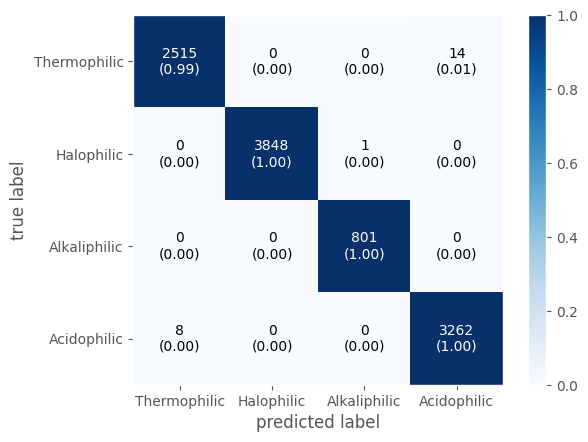

In [112]:
classes = np.unique(training_labels)

confusion_matrix_data = confusion_matrix(training_labels, predicted_training_labels, labels=classes)
conf_matrix(confusion_matrix_data)

In [108]:
# Basic Protocol 3 — Step 10

predicted_testing_labels = classifier.predict(test_dataset)
accuracy = accuracy_score(testing_labels, predicted_testing_labels)
error_rate(testing_labels, predicted_testing_labels)

acc: 0.6727025803531009
f1: 0.5335102529733529
mcc: 0.4406371929929315
sn: [0.7057793345008757, 0.6906534325889164, 0.6740237691001698, 0.6622807017543859, 0.6882898062342039, 0.6932203389830508, 0.7041420118343196, 0.6888888888888889, 0.7275922671353251, 0.6931124673060157, 0.7015570934256056, 0.7135720233139051, 0.704, 0.702656383890317, 0.7064459930313589, 0.7015570934256056, 0.7096491228070175, 0.6724890829694323, 0.6768027801911382, 0.7039586919104991, 0.6824561403508772, 0.6955403087478559, 0.6740804106073567, 0.7052456286427977, 0.6916299559471366, 0.7118205349439172, 0.7135549872122762, 0.6921768707482994, 0.7159763313609467, 0.7026055705300989, 0.6884247171453438, 0.7145228215767635, 0.6814011676396997, 0.6984536082474226, 0.6989795918367347, 0.6770657672849916, 0.6822916666666666, 0.6880733944954128, 0.6689478186484175, 0.691063829787234, 0.6903765690376569, 0.6974494283201407, 0.6885813148788927, 0.7079419299743809, 0.6839788732394366, 0.6924959216965743, 0.7042372881355933,

(0.009728422054378521, 0.016388977085471, 0.021448580274992055)

In [109]:
df =pd.DataFrame(train_dataset)
df.to_excel('/content/cnn_train_dataset.xlsx')
df =pd.DataFrame(training_labels)
df.to_excel('/content/cnn_training_labels.xlsx')
df =pd.DataFrame(predicted_training_labels)
df.to_excel('/content/cnn_pred_train_labels.xlsx')

df =pd.DataFrame(test_dataset)
df.to_excel('/content/cnn_test_dataset.xlsx')
df =pd.DataFrame(testing_labels)
df.to_excel('/content/cnn_testing_labels.xlsx')
df =pd.DataFrame(predicted_testing_labels)
df.to_excel('/content/cnn_pred_test_labels.xlsx')

OSError: Cannot save file into a non-existent directory: '/content'

In [ ]:
#from pandas import DataFrame
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_conv_activation','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [113]:
# Further metrics
from sklearn.metrics import confusion_matrix

# Data visualization
import plotly.express as px

/tmp/ipykernel_2297/1155589874.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_2297/1155589874.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


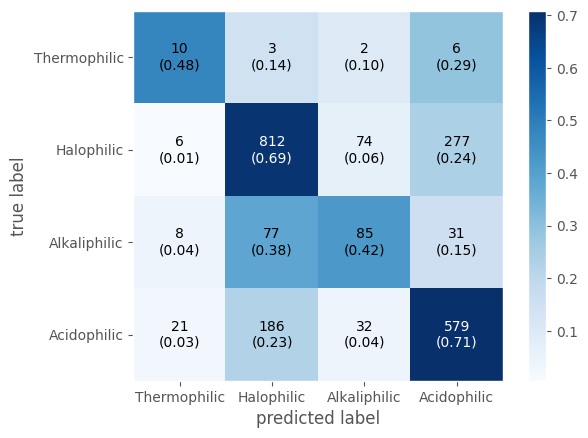

array([[ 10,   3,   2,   6],
       [  6, 812,  74, 277],
       [  8,  77,  85,  31],
       [ 21, 186,  32, 579]])

In [114]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_testing_labels, labels=classes)
conf_matrix(confusion_matrix_data)
confusion_matrix_data

In [115]:
TP = confusion_matrix_data[1,1]
TN = confusion_matrix_data[0,0]
FP = confusion_matrix_data[0,1]
FN = confusion_matrix_data[1,0]

In [116]:
sn = TP / float(TP + FN)
print(sn)

0.9926650366748166


In [117]:
sp = TN / float(TN + FP)
print(sp)

0.7692307692307693
